# README for GRACE/GRACE-FO Machine Learning Anomaly Detection (Random Forest, MLPClassifier (Neural-Network) STL, AutoEncoder, Isolation Forest, misc.)
***
#### *Written By: Eric Leon*
#### *August 2024*
#### *For questions/complaints/good jokes: ericleon@umich.edu*

## **Introduction:**

Before diving into the implementation, it is somewhat important to understand what these methods are doing and how they connect to the greater fabric of ML anomaly detection in general. <br>

ML algorithms in general fall into two main categories:<br>
***Supervised Learning:*** Whether you are predicting a label or a value, supervised learning (SL) algorithms have the advantage of having predetermined targets. This means that you have lots of training data that is already labeled and you are using this to train the model. There is also the advantage of being able to quantify the accuracy of the model based on how well it did classifying (or predicting a value) of test data. The supervised models here are the **Random Forest** and **MLPClassifier**. There is also functionality to combine the results of both of these methods into a 'meta' (combined) model. Instructions to do this are under "Random Forest/MLPClassifier Code Notes/Examples:" <br>
<br>
***Unsupervised Learning:*** This method does not require targets but instead uses statistics and decision trees to deconstruct and reconstruct a signal. This method is difficult to assess on accuracy, and usually requires an expert to do so. **STL, AutoEncoder, and Isolation Forest** fall into this category.


## **Required Libraries**:

For every method in this documentation, I would recommend importing the following libraries...<br>
`import numpy as np`
<br>
`import pandas as pd`
<br>
`from sklearn.model_selection import train_test_split`
<br>
`import matplotlib.pyplot as plt`
<br>
`from scipy.stats import norm`
<br>
`import math`
<br>
`import seaborn as sns`
<br>
`import os`
<br>
`from sklearn.model_selection import GridSearchCV`
<br>
`from imblearn.over_sampling import SMOTE`
<br>

Also, consider making these plots interactive so you can zoom and pan. On jupyter nb you can use %matplotlib ot %matplotlib notebook. On jupyter lab (which is what I used) I had to install 'pyod' and 'matplotlib widgets' (look up how to do this) and then used the magic %matplotlib widget
***
For **Random Forest**, you will additionally need...<br>
`from sklearn.ensemble import RandomForestRegressor, IsolationForest,RandomForestClassifier`
<br>
`from sklearn.model_selection import train_test_split`
<br>
`from sklearn.metrics import mean_squared_error`
<br>
`from sklearn.preprocessing import StandardScaler,RobustScaler`
<br>
`from sklearn.neural_network import MLPClassifier`
<br>
`from sklearn.metrics import classification_report`
<br>
***
For the **MLPClassifier**, you will additionally need...<br>
`from sklearn.neural_network import MLPClassifier`
<br>
`from sklearn.linear_model import LogisticRegression`
<br>
***
For **STL**, you will additionally need...<br>
`from statsmodels.tsa.seasonal import seasonal_decompose`
<br>
`from scipy.fft import fft, fftfreq`
<br>
***
For **Isolation Forest** you will additionally need...<br>
`from sklearn.ensemble import IsolationForest`
<br>
`from sklearn.metrics import classification_report, confusion_matrix`
<br>
`from sklearn.preprocessing import StandardScaler`
<br>
***
For the **AutoEncoder**, you will additionally need...<br>
`from pyod.models.auto_encoder import AutoEncoder`
<br>
`from tensorflow.keras.models import Model`
<br>
`from tensorflow.keras.layers import Input, Dense`
<br>
`from statsmodels.stats.outliers_influence import variance_inflation_factor`
<br>
`from scipy.stats import norm`
<br>
Note that the modules in pyod and tensorflow don't work (for some reason) with updated numpy and scipy. So to make this work, you will likely need to downgrade to 
tensorflow version < 2.11, numpy 1.21, scipy 1.7.3. If it still doesn't work, then consult the wizards in stack overflow and chatgpt. The autoencoder was particularly senstitive to its dependencies. 

## **Random Forest and/or MLPClassifier (Supervised)**

Both the Random Forest and MLPClassifier are supervised methods to identify patterns with training data and apply the results to test data. Both models within the FilterDataRFNN() class require years, months, and days. These times refer to the testing data. To train the model on more, less, or different days, you must modify the code within the 'createTrain()' method. The Random Forest utilizes decision trees to make decisions, and the MLPClassifier is a Neural-Network, which encodes the data and recodes it, and compares the result to the original training data to gauge its accuracy. You can test the model on as many days of a month as you want, but in its current state, the class cannot test the model over several months. This feature could be added later. As shown in the "Random Forest/MLPClassifier Code Notes/Examples" section, pay attention to the format of the arguments, especially on how the test days are inputted. The days should be in an array to visualize anomalies. And when creating a delete card, the method should be employed in a for loop with the day as a 1-element array. This can be improved in future versions. 

>### Random Forest/MLPClassifier Code:

```Python
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

class FilterDataRFNN: #Use Random Forest and/or Neural Network
    def __init__(self,a_type="A"):

        self.a_type = a_type
        
    def getData(self):
        from numpy import loadtxt
        #NOTE: This path must be edited to match the path on individual machine
        #WINDOWS: single quotes, double slashes, no slash at end, must have 'C:\\Users...' at the beginning
        #MAC (What this is written in): Single quotes, single slashes
        if self.type == 'mwi': #microwave interferometer
            pathName ={INSERT YOUR PATH HEAD HERE}'/mwi_resid_'+self.YYYY+self.MM+self.DD+'.txt/mwi_resid_'+self.YYYY+self.MM+self.DD+'.txt'
            data = loadtxt(pathName,float)
            
        elif self.type == 'lri':#laser range interferometer
            pathName = {INSERT YOUR PATH HEAD HERE}'lri_resid_'+self.YYYY+self.MM+self.DD+'.txt'
            data = loadtxt(pathName,float)
            
        elif self.type == 'pmwi': #pre-KBRR-edit Microwave interferometer
            pathName = {INSERT YOUR PATH HEAD HERE}/mwi_resid_'+self.YYYY+self.MM+self.DD+'.txt'
            data = loadtxt(pathName,float)
            
        elif self.type == 'acc1b':#Accelerometer data
            pathName = {INSERT YOUR PATH HEAD HERE}'/ACC1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_02.asc/ACC1B_'+self.YYYY+'-'+self.MM+'
            '+self.DD+'_'+self.a_type+'_02.asc'''
            
            # Read the file and store lines
            with open(pathName, 'r') as file:
                lines = file.readlines()
            
            # Skip the first 24 lines (header) and extract data lines
            header_lines = 24
            data_lines = lines[header_lines:]
            
            # Initialize an empty list to hold the structured data
            data = []
            
            # Process the data lines
            for line in data_lines:
                # Strip leading/trailing whitespace and split by spaces
                split_line = line.strip().split()
                # Add the processed line to the structured_data list
                data.append(split_line)
            file.close()
                
        elif self.type == 'sca1b': #STAR camera data
            pathName ={INSERT YOUR PATH HEAD HERE}'/SCA1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_03.asc/SCA1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_03.asc'

            try:
                # Read the file and store lines
                with open(pathName, 'rb') as file:
                    lines = file.readlines()
                
                # Decode lines if opened in binary mode
                lines = [line.decode('utf-8') for line in lines]
                
                # Skip the first 20 lines (header) and extract data lines
                header_lines = 20
                data_lines = lines[header_lines:]
                
                # Initialize an empty list to hold the structured data
                data = []
                
                # Process the data lines
                for line in data_lines:
                    # Strip leading/trailing whitespace and split by spaces
                    split_line = line.strip().split()
                    # Add the processed line to the structured_data list
                    data.append(split_line)
                
            except OSError as e:
                print("Error opening file:", e)
                data = []
            file.close()

        
        return data
    def euler_from_quaternion(self,x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians
    
    def createDF(self,y,m,d,t):
        
        if t == 'pmwi' or t == 'mwi' or t == 'lri':
            feature_names = ['time(s)','residuals(m/s)','altitude(m)','latitude','longitude']
            data = self.getData(year=y,month=m,day=d,t=t)
            df = pd.DataFrame(data,columns=feature_names)

        elif t == 'acc1b':
            data = self.getData(year=y,month=m,day=d,t=t)
            # Define the column names. Specifics for acc1b can be found on pg 33 of L1B_Handbook
            columns = [
                'time(s)', 'identifier', 'lin_accl_x', 'lin_accl_y', 'lin_accl_z',
                'ang_accl_x', 'ang_accl_y', 'ang_accl_z', 'acl_x_res', 'acl_y_res', 'acl_z_res', 'qualflg'
            ]
            
            # Convert the structured data into a DataFrame
            df = pd.DataFrame(data)
            
            # Verify the number of columns and their content
            #print(df.head())
            
            # Set the appropriate column names
            df.columns = columns
            
            #make numeric values appear as numeric, skip over the "identifier"(A or B), which is a string
            for col in ['time(s)', 'lin_accl_x', 'lin_accl_y', 'lin_accl_z', 'ang_accl_x', 'ang_accl_y', 'ang_accl_z', 'acl_x_res', 'acl_y_res', 'acl_z_res']:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            
            # Adjust time steps so it matches mwi data (5s steps). If you want every second of data, comment out this section
            t_start = df[['time(s)']].values[0]
            df = df.iloc[2::5]  # Skip by 5s time steps
            df['time(s)'] = df['time(s)'] - t_start
            df = df.drop(df.index[-1])  # Drop last row since last row doesn't match
        
        elif t == 'sca1b':
            data = self.getData(year=y,month=m,day=d,t=t)
            #print("Data:", data[:50])
            # Define the column names. Specifics for acc1b can be found on pg 33 of L1B_Handbook
            #time = seconds since noon on Jan 01 2000. 
            #sca_id -> 1 - Star camera 1, 2 - Star camera 2, 3 = IMU, 4 = combo of 1 and 2
            #quantangle = cos mu/2 element of quaternion

            
            columns = [
                'time(s)', 'identifier', 'sca_id', 'quatangle', 'quaticoeff',
                'quatjcoeff', 'quatkcoeff', 'qual_res','qualflg']
            
            # # Convert the structured data into a DataFrame
            df = pd.DataFrame(data)
            
            # # Verify the number of columns and their content
            # #print(df.head())
            
            # # Set the appropriate column names
            df.columns = columns
            

            #make numeric values appear as numeric, skip over the "identifier"(A or B), which is a string
            for col in ['time(s)', 'sca_id', 'quatangle', 'quaticoeff','quatjcoeff', 'quatkcoeff', 'qual_res','qualflg']:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            rolls = []
            pitches = []
            yaws = []
            for row in range(len(df)):
                w = df['quatangle'][row]
                x = df['quaticoeff'][row]
                y = df['quatjcoeff'][row]
                z = df['quatkcoeff'][row]
                roll,pitch,yaw = self.euler_from_quaternion(x, y, z, w)
                rolls.append(roll)
                pitches.append(pitch)
                yaws.append(yaw)
                

            df['roll'] = rolls
            df['pitch'] = pitches
            df['yaw'] = yaws

            
            # for col in ['time(s)', 'sca_id', 'quatangle', 'quaticoeff','quatjcoeff', 'quatkcoeff', 'qual_res','qualflg','roll','pitch','yaw']:
            #     df[col] = pd.to_numeric(df[col], errors='coerce')
            # Adjust time steps so it matches mwi data (5s steps). If you want every second of data, comment out this section
            t_start = df[['time(s)']].values[0]
            df = df.iloc[2::5]  # Skip by 5s time steps
            df['time(s)'] = df['time(s)'] - t_start
            df = df.drop(df.index[-1])  # Drop last row since last row doesn't match

                        
        
        return df
    def createTrain(self):
        years = ['2002','2003','2004','2005','2006']#,'2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
        # months = ['01','02','03','04','05','06','07','08','09','10','11','12']
        months = ['02','03','07','10']
        days = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
        argy  = 'residuals(m/s)'
        argx = 'time(s)'
        time_step = 5 #seconds
        
        def mask(df_pre,df_post):
            df_merged = pd.merge(df_pre, df_post, on='time(s)', how='outer', suffixes=('_pre', '_post'))
        
            # Initialize a new column to store anomaly status
            df_merged['anomaly'] = False
            
            
            # Mark rows where residuals differ as anomalies
            df_merged.loc[df_merged['latitude_pre'] != df_merged['latitude_post'], 'anomaly'] = True
            
            # Mark rows that are present in pre but not in post as anomalies
            df_merged.loc[df_merged['latitude_post'].isna(), 'anomaly'] = True
            
            # Mark rows that are present in post but not in pre as anomalies
            df_merged.loc[df_merged['latitude_pre'].isna(), 'anomaly'] = True
            
            # Filter anomalies
            anomalies = df_merged[df_merged['anomaly'] == True]
            # Filter non-anomalies
            non_anomalies = df_merged[df_merged['anomaly'] == False]
            
            
            # Create a boolean mask that aligns with the index of df_pre
            mask_pre = df_merged[df_merged['time(s)'].isin(df_pre['time(s)'])]['anomaly'].values
            
            # Ensure the mask is the same length as df_pre
            assert len(mask_pre) == len(df_pre), "Mask length does not match df_pre length"
        
            return mask_pre

    

        dfs = []
        for yy in years:
            for mm in months:
                print(f'Training: working on {mm}/{yy}')
                for dd in days:
                    try:
                        df_1 = self.createDF(yy, mm, dd, t='pmwi')
                        df_2 = self.createDF(yy, mm, dd, t='mwi')
                        print(f"Created df_1 with shape: {df_1.shape}")
                        print(f"Created df_2 with shape: {df_2.shape}")
                        
                        anomMask = mask(df_1, df_2)
                        df_1 = df_1.drop(['latitude', 'longitude'], axis=1)
                        df_1['anomaly'] = anomMask
                        print(f"df_1 after adding anomaly mask with shape: {df_1.shape}")
        
                        df_3 = self.createDF(yy, mm, dd, t='acc1b').drop(['time(s)', 'identifier', 'lin_accl_x', 'lin_accl_y', 'lin_accl_z', 'ang_accl_x', 'ang_accl_y', 'ang_accl_z', 'qualflg'], axis=1)
                        df_4 = self.createDF(yy, mm, dd, t='sca1b').drop(['time(s)', 'identifier', 'sca_id', 'quatangle', 'quaticoeff', 'quatjcoeff', 'quatkcoeff', 'qual_res', 'qualflg'], axis=1)
                        print(f"Created df_3 with shape: {df_3.shape}")
                        print(f"Created df_4 with shape: {df_4.shape}")
                        
                        df = pd.concat([df_1, df_3, df_4], axis=1)
                        df = df.dropna().reset_index(drop=True)
                        print(f"Concatenated df with shape: {df.shape}")
        
                        if not df.empty:
                            dfs.append(df)
                            print(f'dfs now has {len(dfs)} elements')
                        else:
                            print("Resulting DataFrame is empty after dropna")
                    except Exception as e:
                        print(f"Exception occurred: {e}")
                        continue
        print(f'Final dfs now has {len(dfs)} elements')

        # Concatenate all DataFrames
        combined_df = pd.concat(dfs, ignore_index=True)
        
        # Drop NaNs and reset index
        combined_df = combined_df.dropna().reset_index(drop=True)
        
            
        df2 = combined_df
        return df2


        
    def createTest(self,YYYY1,MM1,days1):
        from sklearn.preprocessing import StandardScaler, RobustScaler
        #Test data
        # YYYY1 = '2007'
        # MM1 = '03'#1,4,5,6,8,9,11,12
        # d1 = '07'
        # days1 = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
        # #days1 = ['01','02','03','04']
        df1s = []
        for d in days1:
            try:
                df1_1 = self.createDF(YYYY1, MM1, d, t='pmwi').drop(['latitude', 'longitude'], axis=1)
                print(f"Created df1_1 for {d} with shape: {df1_1.shape}")
                
                df1_3 = self.createDF(YYYY1, MM1, d, t='sca1b').drop(['time(s)', 'identifier', 'sca_id', 'quatangle', 'quaticoeff', 'quatjcoeff', 'quatkcoeff', 'qual_res', 'qualflg'], axis=1)
                print(f"Created df1_3 for {d} with shape: {df1_3.shape}")
                
                df = pd.concat([df1_1, df1_3], axis=1)
                print(f"Concatenated df for {d} with shape: {df.shape}")
        
                df = df.dropna().reset_index(drop=True)
                print(f"Final df for {d} after dropna with shape: {df.shape}")
        
                if not df.empty:
                    df1s.append(df)
                    print(f'df1s now has {len(df1s)} elements')
                else:
                    print(f"Resulting DataFrame for {d} is empty after dropna")
            except Exception as e:
                print(f"Exception occurred for {d}: {e}")
                continue
        print(f'Final df1s now has {len(df1s)} elements')


        for i in range(1, len(df1s)):
            max_time_prev = df1s[i-1]['time(s)'].max()
            df1s[i]['time(s)'] += max_time_prev + 5
            
        
                # Concatenate all DataFrames
        combined_df1 = pd.concat(df1s, ignore_index=True)
        
        # Drop NaNs and reset index
        combined_df1 = combined_df1.dropna().reset_index(drop=True)
        
            
        df1 = combined_df1
        return df1
        

    def plotData(self): #drawLine=True/False;s=standard deviation,put desired order

        %matplotlib widget
        plt.figure(dpi=100).set_figwidth(10)
        df = self.createDF()
        

            
        plt.plot(df[f'{self.argx}'],df[f'{self.argy}'],'b+') #splitData returns array of array
        plt.xlabel(f"{self.argx}")
        plt.ylabel(f"{self.argy}")
        if self.type == 'mwi':
            plt.title(f"mwi_{self.YYYY+self.MM+self.DD}")
        elif self.type == 'lri':
            plt.title(f"lri_{self.YYYY+self.MM+self.DD}")
        elif self.type == 'pmwi':
            plt.title(f"PreEdited_mwi_{self.YYYY+self.MM+self.DD}")
        plt.show()

    def RF(self,YYYY1,MM1,days1,model,smote):
        
        df_train = self.createTrain()
        df_test = self.createTest(YYYY1,MM1,days1)
        features = ['residuals(m/s)','altitude(m)']
        X_train = df_train[features]
        df_train['anomaly'] = df_train['anomaly'].astype(bool)
        y_train = df_train['anomaly']

        # Apply Robust Scaler
        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        
        X_test = df_test[features]
        X_test_scaled = scaler.fit_transform(X_test)

        # Handle imbalanced data using SMOTE
        if smote == True:
            smote = SMOTE(random_state=42)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
        else:
            X_train_resampled, y_train_resampled = X_train_scaled,y_train
        #X_train_resampled, y_train_resampled = X_train_scaled, y_train 
        
        # Train Random Forest
        if model=='rf':
            rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
            rf_clf.fit(X_train_resampled, y_train_resampled)
            train_pred = rf_clf.predict(X_train_scaled)
            y_pred = rf_clf.predict(X_test_scaled)
        elif model == 'nn':
            # Train Neural Network
            nn_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
            nn_clf.fit(X_train_resampled, y_train_resampled)
            train_pred = nn_clf.predict(X_train_scaled)
            y_pred = nn_clf.predict(X_test_scaled)
        elif model == 'meta':   
            #train random forest
            rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
            rf_clf.fit(X_train_resampled, y_train_resampled)
            rf_train_pred = rf_clf.predict(X_train_scaled)
            rf_test_pred = rf_clf.predict(X_test_scaled)
        
            # Train Neural Network
            nn_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
            nn_clf.fit(X_train_resampled, y_train_resampled)
            nn_train_pred = nn_clf.predict(X_train_scaled)
            nn_test_pred = nn_clf.predict(X_test_scaled)

            
            # Create new training data for meta-model
            meta_X_train = pd.DataFrame({
                'rf_pred': rf_train_pred,
                'nn_pred': nn_train_pred
            })
        
        
            # Train the meta-model (e.g., logistic regression)
            meta_clf = LogisticRegression(random_state=42)
            meta_clf.fit(meta_X_train, y_train)
            
            meta_X_test = pd.DataFrame({
            'rf_pred': rf_test_pred,
            'nn_pred': nn_test_pred
            })
            
            y_pred = meta_clf.predict(meta_X_test) 
        

        
        
        return y_pred

        

        
        
        

    def createDeleteCard(self,fileName, YYYY1 = '2007', MM1 = '03',days1 = ['07'],model = 'nn',smote=True):
        anomalies = self.RF(YYYY1,MM1,days1,model,smote)
        df1 = self.createTest(YYYY1,MM1,days1)
        step = 3 #5 second time intervals for mwi, 2 second step for lri
        bad_df=df1[anomalies]
        #display(bad_df)
        bad_times = bad_df['time(s)'].values
    
        for t in range(len(bad_times)):
            time = bad_times[t] #current time
            te = time + step #time step after
            tb = time - step#time step before
    
            
            #calculate Hours, Minutes and Seconds:
    
            #present
            HH = int(time // (3600))
            MM = int((((time/3600) - HH)*60)//1)
            SS = int(time - (HH*3600) - (MM*60))
    
            #before (start)
            Hb = int(tb // (3600))
            Mb = int((((tb/3600) - Hb)*60)//1)
            Sb = int(tb - (Hb*3600) - (Mb*60)) 
    
            #after (End)
            He = int(te // (3600))
            Me = int((((te/3600) - He)*60)//1)
            Se = int(te - (He*3600) - (Me*60))  
    
    
            
            #address if minute changes into hours
            if Me >= 60: #if the minutes crosses 60
                He += 1 #bump up hour
                Me %= 60 #reset minute modulo (remainder of ) /60
            if Mb <= 0: #if minutes are bumped down under zero
                if Hb != 0: 
                    Hb -= 1 #bump hour down
                    Mb += 60 #add 60 so it is base 60 again (ex. -2 + 60 = 58min)
                else: #if hour is 0, then we can't bump it down, without this line the minutes do weird things and becomes -16
                    Mb = 0
                    
            #check 1 or 2 digits
            if HH / 10 >= 1: #2-digit numbers are greater than 10
                HH = str(HH)
            else: #if not 2 didgts, add a zero to the string
                HH = '0'+str(HH)
                
            if Hb / 10 >= 1: 
                Hb = str(Hb)
            else:
                Hb = '0'+str(Hb)
                
            if He / 10 >= 1: 
                He = str(He)
            else:
                He = '0'+str(He)    
                    
    
    ###############################
            #bump minute if seconds crosses minute path
            if Se >=60:
                Me += 1
            if Sb <= 0:
                Mb -= 1
    
            #check if minutes are 1 or 2 digits
            if MM / 10 >= 1:
                MM = str(MM)
            else: 
                MM = '0'+str(MM)
            if Mb / 10 >= 1: 
                Mb = str(Mb)
            else:
                Mb = '0'+str(Mb)
                
            if Me / 10 >= 1: 
                Me = str(Me)
            else:
                Me = '0'+str(Me)
    
    
    #########################
    
            
            #boundaries around minute changes
            if Se >=60:
                Se = Se%60
            if Sb <= 0:
                Sb += 60
            elif Sb <= 0 and Mb == 0:
                Sb == 0
    
            #2 digits check
            if SS / 10 >= 1: 
                SS = str(SS)
            else: 
                SS = '0'+str(SS)
                
            if Sb / 10 >= 1: 
                Sb = str(Sb)
            else:
                Sb = '0'+str(Sb)
                
            if Se / 10 >= 1: 
                Se = str(Se)
            else:
                Se = '0'+str(Se)

            hms1 = Hb+Mb+Sb+'.00'
            hms2 = He+Me+Se+'.00'
            #print(f'DELETE         44                       {self.YYYY[-2:]}{self.MM}{self.DD}{hms1}     {self.YYYY[-2:]}{self.MM}{self.DD}{hms2}     hiKBRR')
            
            f = open(f'{fileName}.txt', "a") # "a" is append mode
            #DO NOT change the formatting of the next line unless you know the delete card format as per the GEODYN documentation
            f.write(f'DELETE         44                       {YYYY1[-2:]}{MM1}{days1[0]}{hms1}     {YYYY1[-2:]}{MM1}{days1[0]}{hms2}     hiKBRR\n')
            f.close()
            #Guide for 80 character format limit
            #print('----+----1----+----2----+----3----+----4----+----5----+----6----+----7----+----8')
            #print("")
            
            
    
            #Line for testing purposes
            #print(f"{Hb}{Mb}{Sb}.00  {He}{Me}{Se}.00 where bad time is: {HH}{MM}{SS}")
    


    def plotEdit(self,YYYY1 = '2007', MM1 = '03',days1 = ['07'],model = 'nn',smote=True): #plot the filtered data
        # Plot the results
        #this magic inline command makes the plot interactive, but you must have pyod and pyod widgets installed
        %matplotlib widget

        y_pred = self.RF(YYYY1,MM1,days1,model,smote)
        df_test = self.createTest(YYYY1,MM1,days1)
        if smote ==True:
            sm = '(SMOTE)'
        else:
            sm = ''
        
        plt.close()
        plt.figure(figsize=(10,6))
        plt.subplots_adjust(right=0.9, top=0.8) 
        sns.scatterplot(x=df_test['time(s)'], y=df_test['residuals(m/s)'], hue=y_pred, palette={0: 'blue', 1: 'red'}, style=y_pred, markers={0: '.', 1: 'X'},edgecolor='none',s=50)
        
        # Customize the legend
        handles, labels = plt.gca().get_legend_handles_labels()
        labels = ['Data', 'Anomaly']  # Custom labels
        plt.legend(handles=handles, labels=labels)
        #plt.title(f"mwi{YYYY1}{MM1}{days1[0]}-{days1[-1]} RF Classifier on 12 months with {sum(y_pred_clf)} outliers,RobustScalar")
        plt.title(f'{sm} Trained on 20 months. Tested on pmwi_{YYYY1}{MM1}{days1[0]}-{days1[-1]} with {sum(y_pred)} outliers. Model = {model}')
        plt.show()
```

>### Random Forest/MLPClassifier Code Notes/Examples:

Syntax to Use FilterDataRFNN:<br>
`FilterDataRFNN().{desired_function}()`<br>
<br>
Valid functions: <br>
`.plotEdit(YYYY1 = '2007', MM1 = '03',days1 = ['07'],model = 'nn',smote=True)` -> Plots anomalous points on top of test data<br>
`.createDeleteCard(fileName, YYYY1 = '2007', MM1 = '03',days1 = ['07'],model = 'nn',smote=True)`-> Writes a delete card to a specified file. NOTE that the day must be an array of 1 element. <br>
`. RF(YYYY1,MM1,days1,model,smote)`-> Returns boolean list as long as test data. True s an anomaly, False is normal.<br>
Valied smote: `[True,False]` -> SMOTE (Synthetic Minority Oversampling technique). Makes the models more aggressive. Read documentation on imblearn's website for more info.<br>
Valid Models: `'rf' (Random Forest), 'nn' (Neural Network), 'meta' (combining both)` NOTE: 'nn' worked the best in my experience. Although SMOTE made it too aggressive, and without SMOTE it wasn't aggressive enough.<br>
Valid data_types: `['mwi','pmwi','acc1b','sca1b']`<br>
Valid years: `['2002' -through-> 'end of mission']` note that anything after JUNE 2018 is GRACE-FO Data<br>
Valid Months: `['01' -through-> '12']`<br>
Valid Days: `['01' -through-> '31']`<br>


**Examples:** <br>
To create the dataframe: <br>
```Python
df = FilterDataRFNN().createDF(y='2007',m='03',d='10',t='pmwi')
```


Plot data with marked anomalies: <br>
```Python
#Days must be array
days = ['01','02','03','04']#,'05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
FilterDataRFNN().plotEdit(model = 'nn',days1 = days)
```
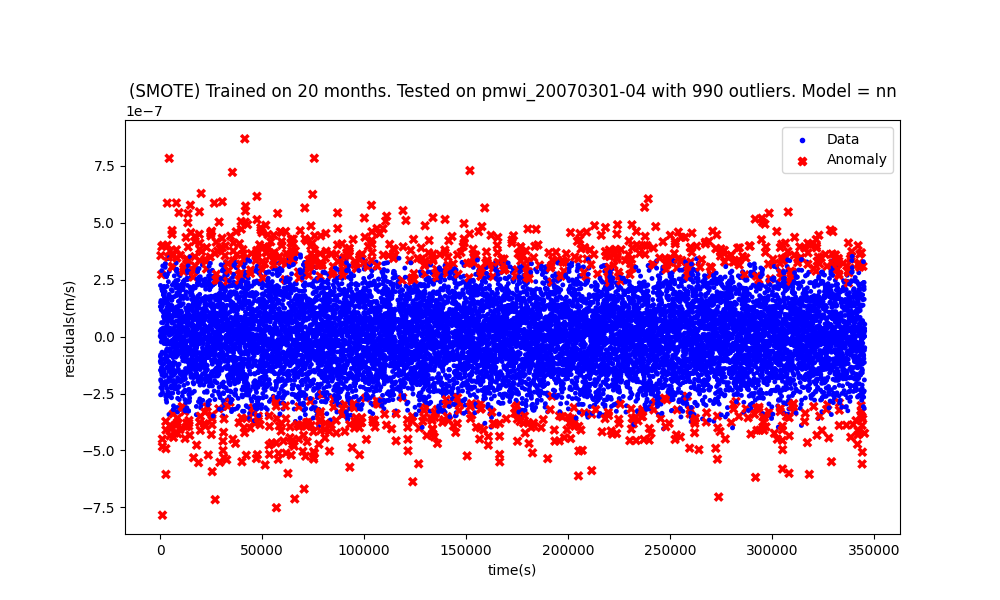 <br>

Additional Example:
```Python
days = ['01','02','03','04','05','06','07','08','09','10']#,'11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
FilterDataRFNN().plotEdit(YYYY1 = '2007', MM1 = '03', model = 'rf',days1 = days,smote = False)
```
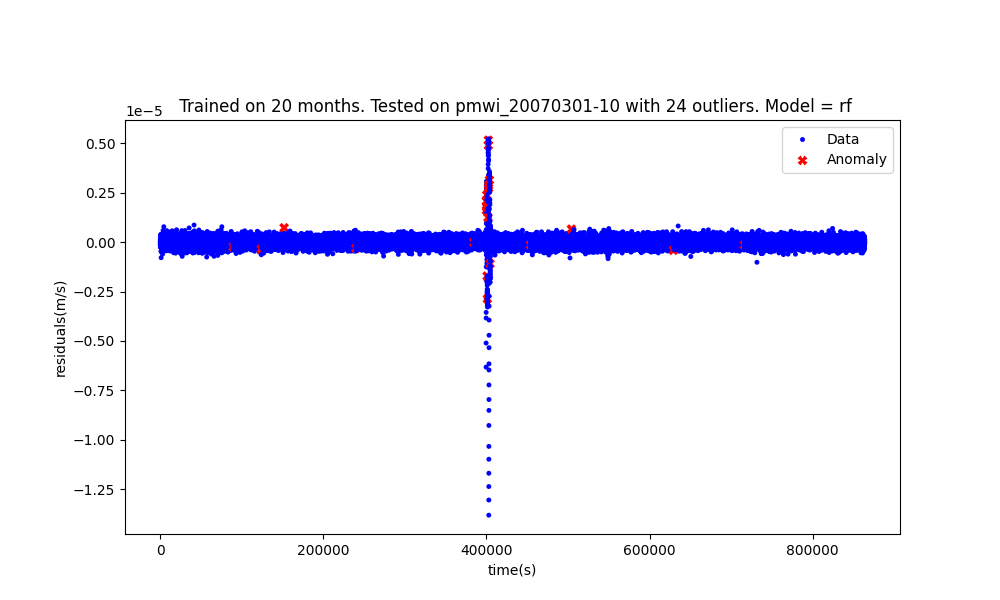 <br>


Create GEODYN-friendly delete card for a whole month day-by day: <br>
```Python
days = ['01','02','03','04']
for d in days:
    FilterDataRFNN().createDeleteCard(fileName = 'D1_March2007_DeleteCard_SMOTE+NN',days1 = [f'{d}'],smote=False)
```

## **Seasonal Decomposition using LOESS (STL) (Unsupervised)**

>This method splits your primary signal into trend, seasonal, and residual signals. The *Trend* refers to the overall tendency of the data; if it grows, shrinks, or a mix of both. A pure sine wave is purely periodic so it's trend should just be a straight horizontal line. The *Seasonal* component shows the period of a signal. For a periodic signal with a lot of noise, the seasonal component should just be the pure periodic signal. The *Residual* component is simply what is leftover. Or, what you get when you subtract the trend and seasonal components from the primary signal. <br>

>Once the residuals have been identified, a hard cutoff is made to them in terms of standard deviations, anything outside of your defined threshold is defined as an outlier.<br>
>It should also be noted that the STL requires a period for the underlying signal. To achieve this, a function, "findPer()" was created to infer the period via a Fast-Fourier Transform.

>### STL Code:

```Python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from scipy.stats import norm
import math
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fft import fft, fftfreq


class FilterDataSTL:
    def __init__(self,f_type,YYYY,MM,DD,argx='time(s)',argy='residuals(m/s)',a_type="A"):#You can make it sattelite "A" or "B" for a_type

        self.YYYY= YYYY #Can be referenced throughout class
        self.MM = MM
        self.DD = DD
        self.argx = argx
        self.argy = argy
        self.type = f_type
        self.a_type = a_type
        
    def getData(self):
        from numpy import loadtxt
        #NOTE: This path must be edited to match the path on individual machine
        #WINDOWS: single quotes, double slashes, no slash at end, must have 'C:\\Users...' at the beginning
        #MAC (What this is written in): Single quotes, single slashes
        if self.type == 'mwi': #microwave interferometer
            pathName ={INSERT YOUR PATH HEAD HERE}'/mwi_resid_'+self.YYYY+self.MM+self.DD+'.txt/mwi_resid_'+self.YYYY+self.MM+self.DD+'.txt'
            data = loadtxt(pathName,float)
            
        elif self.type == 'lri':#laser range interferometer
            pathName = {INSERT YOUR PATH HEAD HERE}'lri_resid_'+self.YYYY+self.MM+self.DD+'.txt'
            data = loadtxt(pathName,float)
            
        elif self.type == 'pmwi': #pre-KBRR-edit Microwave interferometer
            pathName = {INSERT YOUR PATH HEAD HERE}'/mwi_resid_'+self.YYYY+self.MM+self.DD+'.txt'
            data = loadtxt(pathName,float)
            
        elif self.type == 'acc1b':#Accelerometer data
            pathName = {INSERT YOUR PATH HEAD HERE}'/ACC1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_02.asc/ACC1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_02.asc'
            
            # Read the file and store lines
            with open(pathName, 'r') as file:
                lines = file.readlines()
            
            # Skip the first 24 lines (header) and extract data lines
            header_lines = 24
            data_lines = lines[header_lines:]
            
            # Initialize an empty list to hold the structured data
            data = []
            
            # Process the data lines
            for line in data_lines:
                # Strip leading/trailing whitespace and split by spaces
                split_line = line.strip().split()
                # Add the processed line to the structured_data list
                data.append(split_line)
            file.close()
                
        elif self.type == 'sca1b': #STAR camera data
            pathName ={INSERT YOUR PATH HEAD HERE}'/SCA1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_03.asc/SCA1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_03.asc'

            try:
                # Read the file and store lines
                with open(pathName, 'rb') as file:
                    lines = file.readlines()
                
                # Decode lines if opened in binary mode
                lines = [line.decode('utf-8') for line in lines]
                
                # Skip the first 20 lines (header) and extract data lines
                header_lines = 20
                data_lines = lines[header_lines:]
                
                # Initialize an empty list to hold the structured data
                data = []
                
                # Process the data lines
                for line in data_lines:
                    # Strip leading/trailing whitespace and split by spaces
                    split_line = line.strip().split()
                    # Add the processed line to the structured_data list
                    data.append(split_line)
                
            except OSError as e:
                print("Error opening file:", e)
                data = []
            file.close()

        
        return data
    
    def euler_from_quaternion(self,x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians
    
    def createDF(self):
        
        if self.type == 'pmwi' or self.type == 'mwi' or self.type == 'lri':
            feature_names = ['time(s)','residuals(m/s)','altitude(m)','latitude','longitude']
            data = self.getData()
            df = pd.DataFrame(data,columns=feature_names)

        elif self.type == 'acc1b':
            data = self.getData()
            # Define the column names. Specifics for acc1b can be found on pg 33 of L1B_Handbook
            columns = [
                'time(s)', 'identifier', 'lin_accl_x', 'lin_accl_y', 'lin_accl_z',
                'ang_accl_x', 'ang_accl_y', 'ang_accl_z', 'acl_x_res', 'acl_y_res', 'acl_z_res', 'qualflg'
            ]
            
            # Convert the structured data into a DataFrame
            df = pd.DataFrame(data)
            
            # Set the appropriate column names
            df.columns = columns
            
            #make numeric values appear as numeric, skip over the "identifier"(A or B), which is a string
            for col in ['time(s)', 'lin_accl_x', 'lin_accl_y', 'lin_accl_z', 'ang_accl_x', 'ang_accl_y', 'ang_accl_z', 'acl_x_res', 'acl_y_res', 'acl_z_res']:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            
            # Adjust time steps so it matches mwi data (5s steps). If you want every second of data, comment out this section
            t_start = df[['time(s)']].values[0]
            df = df.iloc[2::5]  # Skip by 5s time steps
            df['time(s)'] = df['time(s)'] - t_start
            df = df.drop(df.index[-1])  # Drop last row since last row doesn't match
        
        elif self.type == 'sca1b':
            data = self.getData()

            
            # Define the column names. Specifics for acc1b can be found on pg 33 of L1B_Handbook
            #time = seconds since noon on Jan 01 2000. 
            #sca_id -> 1 - Star camera 1, 2 - Star camera 2, 3 = IMU, 4 = combo of 1 and 2
            #quantangle = cos mu/2 element of quaternion
            columns = [
                'time(s)', 'identifier', 'sca_id', 'quatangle', 'quaticoeff',
                'quatjcoeff', 'quatkcoeff', 'qual_res','qualflg']
            
            # # Convert the structured data into a DataFrame
            df = pd.DataFrame(data)
            
            
            # # Set the appropriate column names
            df.columns = columns
            

            #make numeric values appear as numeric, skip over the "identifier"(A or B), which is a string
            for col in ['time(s)', 'sca_id', 'quatangle', 'quaticoeff','quatjcoeff', 'quatkcoeff', 'qual_res','qualflg']:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            rolls = []
            pitches = []
            yaws = []
            for row in range(len(df)):
                w = df['quatangle'][row]
                x = df['quaticoeff'][row]
                y = df['quatjcoeff'][row]
                z = df['quatkcoeff'][row]
                roll,pitch,yaw = self.euler_from_quaternion(x, y, z, w)
                rolls.append(roll)
                pitches.append(pitch)
                yaws.append(yaw)
                

            df['roll'] = rolls
            df['pitch'] = pitches
            df['yaw'] = yaws

            # Adjust time steps so it matches mwi data (5s steps). If you want every second of data, comment out this section
            t_start = df[['time(s)']].values[0]
            df = df.iloc[2::5]  # Skip by 5s time steps
            df['time(s)'] = df['time(s)'] - t_start
            df = df.drop(df.index[-1])  # Drop last row since last row doesn't match

                        
        
        return df

    def plotData(self): #simply visualize the data

        %matplotlib widget
        plt.figure(dpi=100).set_figwidth(10)
        df = self.createDF()
        

            
        plt.plot(df[f'{self.argx}'],df[f'{self.argy}'],'b+') #splitData returns array of array
        plt.xlabel(f"{self.argx}")
        plt.ylabel(f"{self.argy}")
        if self.type == 'mwi':
            plt.title(f"mwi_{self.YYYY+self.MM+self.DD}")
        elif self.type == 'lri':
            plt.title(f"lri_{self.YYYY+self.MM+self.DD}")
        elif self.type == 'pmwi':
            plt.title(f"PreEdited_mwi_{self.YYYY+self.MM+self.DD}")
        elif self.type == 'acc1b':
            plt.title(f"PreEdited_acc1b_{self.YYYY+self.MM+self.DD}")
        elif self.type == 'sca1b':
            plt.title(f"PreEdited_sca1b_{self.YYYY+self.MM+self.DD}")
            
        plt.show()
    
    def findPer(self,displayFreq): #find period with Fast-Fourier Transform
        
        df = self.createDF()
        N = len(df['time(s)'])
        if self.type == "mwi" or "pmwi": #different time steps depending on data type. Maybe you want to make LRI 5s like I did with sca1b and acc1b in self.createDF(self)
            T=5.
        elif self.type == 'lri':
            T=2.
        else:
            T = 5.
        yf = fft(df['residuals(m/s)'].values)#.values turns the column into an array
        xf = fftfreq(N, T)[:N//2]
        # Find the peak in the FFT
        idx = np.argmax(2.0/N * np.abs(yf[0:N//2]))
        dominant_freq = xf[idx]
        # Calculate the period
        estimated_period = 1 / dominant_freq
        
        if displayFreq == True:
            # Plot the FFT
            plt.figure(figsize=(10, 6))
            plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
            plt.title('Fourier Transform')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitude')
            plt.show()
        else:
            pass
        return estimated_period
        
    def STL(self,displayDecomp): #run STL algorithm, split data into trend and seasonal components, locate and display anomalies
        #period from FFT
        estimated_period = self.findPer(displayFreq=False)
        #Recreate DF
        df = self.createDF()
        #Decompose elements of signal
        decomposition = seasonal_decompose(df['residuals(m/s)'], period=int(estimated_period), model='additive')
        
        if displayDecomp==True:
            # Plot the decomposition
            decomposition.plot()
            plt.show()
        else:
            pass
        
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid
        # Calculate the mean and standard deviation of the residuals
        mean_resid = np.mean(residual)
        std_resid = np.std(residual)
        # Define a threshold for anomalies (e.g., 3 standard deviations)
        threshold = 3
        
        # Identify anomalies
        anomalies_std = np.abs(residual - mean_resid) > (threshold * std_resid)
        
        return anomalies_std
    


    def createDeleteCard(self,fileName):
        step = 3 #by making this time less than 5, it doesn't get rid of surrouding points.
        df1 = self.createDF()
        anomalies = self.STL()
        bad_df=df1[anomalies]
        #display(bad_df)
        bad_times = bad_df['time(s)'].values
    
        for t in range(len(bad_times)):
            time = bad_times[t] #current time
            te = time + step #time step after
            tb = time - step#time step before
    
            
            #calculate Hours, Minutes and Seconds:
    
            #present
            HH = int(time // (3600))
            MM = int((((time/3600) - HH)*60)//1)
            SS = int(time - (HH*3600) - (MM*60))
    
            #before (start)
            Hb = int(tb // (3600))
            Mb = int((((tb/3600) - Hb)*60)//1)
            Sb = int(tb - (Hb*3600) - (Mb*60)) 
    
            #after (End)
            He = int(te // (3600))
            Me = int((((te/3600) - He)*60)//1)
            Se = int(te - (He*3600) - (Me*60))  
    
    
            
            #address if minute changes into hours
            if Me >= 60: #if the minutes crosses 60
                He += 1 #bump up hour
                Me %= 60 #reset minute modulo (remainder of ) /60
            if Mb <= 0: #if minutes are bumped down under zero
                if Hb != 0: 
                    Hb -= 1 #bump hour down
                    Mb += 60 #add 60 so it is base 60 again (ex. -2 + 60 = 58min)
                else: #if hour is 0, then we can't bump it down, without this line the minutes do weird things and becomes -16
                    Mb = 0
                    
            #check 1 or 2 digits
            if HH / 10 >= 1: #2-digit numbers are greater than 10
                HH = str(HH)
            else: #if not 2 didgts, add a zero to the string
                HH = '0'+str(HH)
                
            if Hb / 10 >= 1: 
                Hb = str(Hb)
            else:
                Hb = '0'+str(Hb)
                
            if He / 10 >= 1: 
                He = str(He)
            else:
                He = '0'+str(He)    
                    
    
    ###############################
            #bump minute if seconds crosses minute path
            if Se >=60:
                Me += 1
            if Sb <= 0:
                Mb -= 1
    
            #check if minutes are 1 or 2 digits
            if MM / 10 >= 1:
                MM = str(MM)
            else: 
                MM = '0'+str(MM)
            if Mb / 10 >= 1: 
                Mb = str(Mb)
            else:
                Mb = '0'+str(Mb)
                
            if Me / 10 >= 1: 
                Me = str(Me)
            else:
                Me = '0'+str(Me)
    
    
    #########################
    
            
            #boundaries around minute changes
            if Se >=60:
                Se = Se%60
            if Sb <= 0:
                Sb += 60
            elif Sb <= 0 and Mb == 0:
                Sb == 0
    
            #2 digits check
            if SS / 10 >= 1: 
                SS = str(SS)
            else: 
                SS = '0'+str(SS)
                
            if Sb / 10 >= 1: 
                Sb = str(Sb)
            else:
                Sb = '0'+str(Sb)
                
            if Se / 10 >= 1: 
                Se = str(Se)
            else:
                Se = '0'+str(Se)

            hms1 = Hb+Mb+Sb+'.00'
            hms2 = He+Me+Se+'.00'
            
            f = open(f'{fileName}.txt', "a") # "a" is append mode
            #DO NOT change the formatting of the next line unless you know the delete card format as per the GEODYN documentation
            f.write(f'DELETE         44                       {self.YYYY[-2:]}{self.MM}{self.DD}{hms1}     {self.YYYY[-2:]}{self.MM}{self.DD}{hms2}     hiKBRR\n')
            f.close()
            #Guide for 80 character format limit
            #print('----+----1----+----2----+----3----+----4----+----5----+----6----+----7----+----8')
            #print("")
            
            
    
            #Line for testing purposes
            #print(f"{Hb}{Mb}{Sb}.00  {He}{Me}{Se}.00 where bad time is: {HH}{MM}{SS}")
    


    def plotEdit(self): #plot the filtered data
        # Plot the results
        #this magic inline command makes the plot interactive, but you must have pyod and pyod widgets installed
        %matplotlib widget

        anomalies = self.STL(displayDecomp=False)
        processed_data = self.createDF()
        
        plt.figure(figsize=(10, 6))
        
        plt.plot(processed_data[f'{self.argx}'], processed_data[f'{self.argy}'], 'b+', label='Data')
        
        anomaly_dates = processed_data[f'{self.argx}'][anomalies]
        anomaly_values = processed_data[f'{self.argy}'][anomalies]

        if self.argy == 'roll' or self.argy == 'pitch' or self.argy == 'yaw':
            unit = "rad"
        elif 'a' in self.argy and 'c' in self.argy and 'l' in self.argy:
            unit = "$m/s^2$"
        else:
            unit = ""
        
        plt.plot(anomaly_dates, anomaly_values, 'ro', markersize=5, label='Anomaly')
        
        plt.title(f'STL: {self.type}_{self.YYYY}{self.MM}{self.DD} with {len(anomaly_dates)} outliers')
        
        plt.xlabel(f'{self.argx}')
        
        plt.ylabel(f'{self.argy} {unit}')
        
        plt.legend()
        
        plt.grid()
        
        plt.show()    
    
   
        
    def outlierplot(self,x_var,y_var):
        import seaborn as sns
        data = self.createDF(display=False)
        # Create a new column in the original dataframe
        data['anomaly'] = 0  # Initialize all values to 0
        anomalies_std = self.STL(displayDecomp=False,displayAnom=False)

        # Map anomalies to the new column based on the detected indices
        # For Standard Deviation Method
        data.loc[anomalies_std, 'anomaly'] = 1
        
        x_var = self.argx
        y_var = self.argy
        outlier_name = "SeasonalDecomposition"
        print(f'Outlier method: {outlier_name}')
        print(f"number of anomalous values = {len(data[data['anomaly']==1])}")
        print(f"number of non-anomalous values = {len(data[data['anomaly']==0])}")
        print(f"total number of value is {len(data)}")

        g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly',aspect=2,hue_order=[0,1])
        g.map(sns.scatterplot,x_var,y_var)
        g.fig.suptitle(f"outlier method: {outlier_name}",y=1.10,fontweight='bold')
        axes=g.axes.flatten()
        axes[0].set_title(f"outliers\n{len(data[data['anomaly']==1])} points")
        axes[1].set_title(f"inliers\n{len(data[data['anomaly']==0])} points")
        plt.subplots_adjust(top=0.85)  # Adjust top spacing to fit the subtitles
        return g
```

>### STL Code Notes/Examples:

Syntax to Use FilterDataSTL:<br>
`FilterDataSTL({data_type},{desired_year},{month},{day},{argx},{argy},{satellite A or B}).{desired_function}()`<br>
<br>
Valid data_types: `['mwi','pmwi','acc1b','sca1b']`<br>
Valid years: `['2002' -through-> 'end of mission']` note that anything after JUNE 2018 is GRACE-FO Data<br>
Valid Months: `['01' -through-> '12']`<br>
Valid Days: `['01' -through-> '31']`<br>
Valid argx (x-axis) or argy (y-axis): Note that default argx = 'time(s)' and argy = 'residuals(m/s)' <br>
>For mwi/lri data: `['time(s)','residuals(m/s)','altitude(m)','latitude','longitude']<br>
>For acc1b data: columns = ['time(s)', 'identifier', 'lin_accl_x', 'lin_accl_y', 'lin_accl_z','ang_accl_x', 'ang_accl_y', 'ang_accl_z', 'acl_x_res', 'acl_y_res', 'acl_z_res', 'qualflg']` <br>
>For sca1b data: columns = `['time(s)', 'identifier', 'sca_id', 'quatangle', 'quaticoeff','quatjcoeff', 'quatkcoeff', 'qual_res','qualflg','roll','pitch','yaw']` <br>

Valid Sattelite types (only for acc1b or sca1b data, otherwise you can skip this): `['A','B']` <br>
<br>
**Examples:** <br>
To create the dataframe: <br>
```Python
df = FilterDataSTL('pmwi','2003','03','04','time(s)','residuals(m/s)').createDF()
```
To visualize the raw data of a certain day with no analysis:<br>
```Python
FilterDataSTL('pmwi','2003','03','07','time(s)','residuals(m/s)').plotData()
```
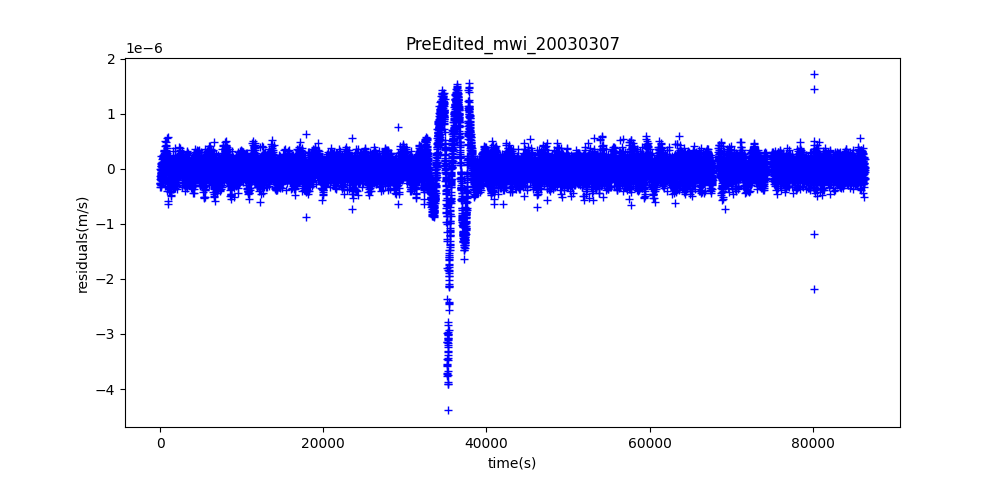  <br>
See STL decomposition plots: <br>
```Python
FilterDataSTL('pmwi','2016','12','10','time(s)','residuals(m/s)').STL(displayDecomp=True)
```
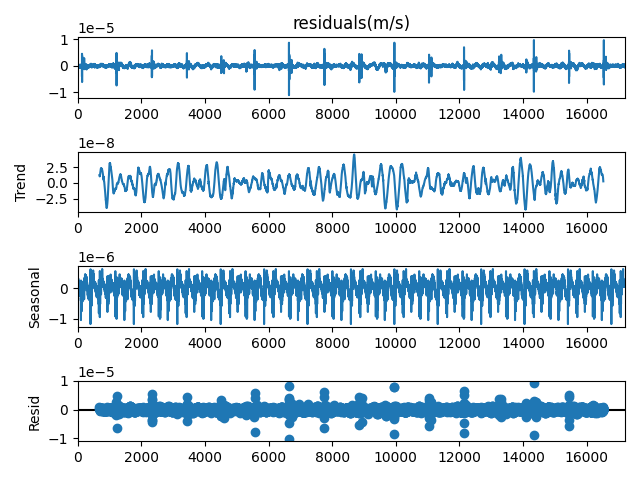 <br>

Plot data with marked anomalies: <br>
```Python
FilterDataSTL('pmwi','2003','03','07','time(s)','residuals(m/s)').plotEdit()
```
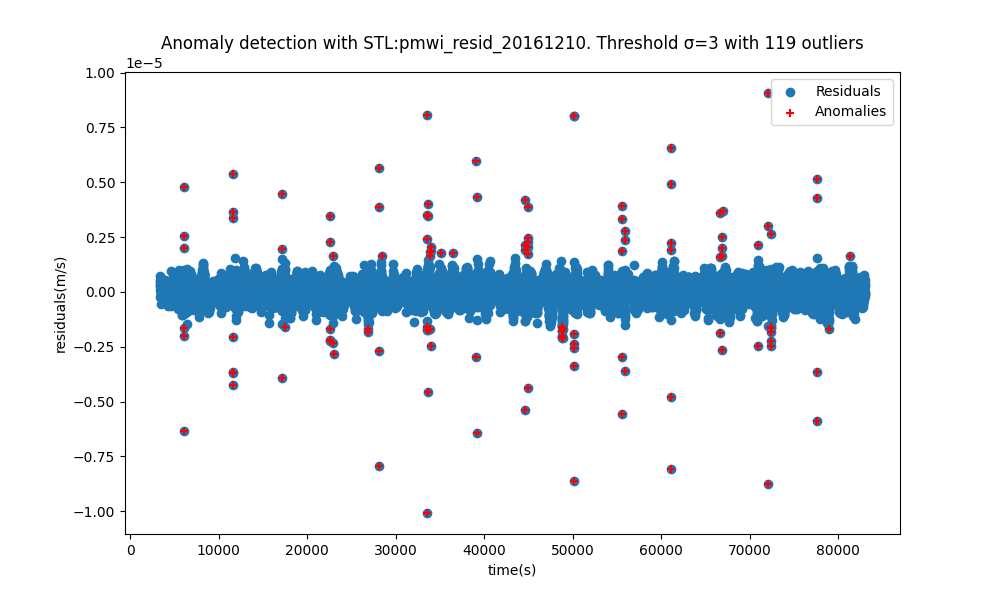 <br>

Plot side to side plot of outliers seperated from the original data: <br>
```Python
FilterDataSTL('pmwi','2005','09','27','time(s)','residuals(m/s)').outlierplot("time(s)","residuals(m/s)")
```
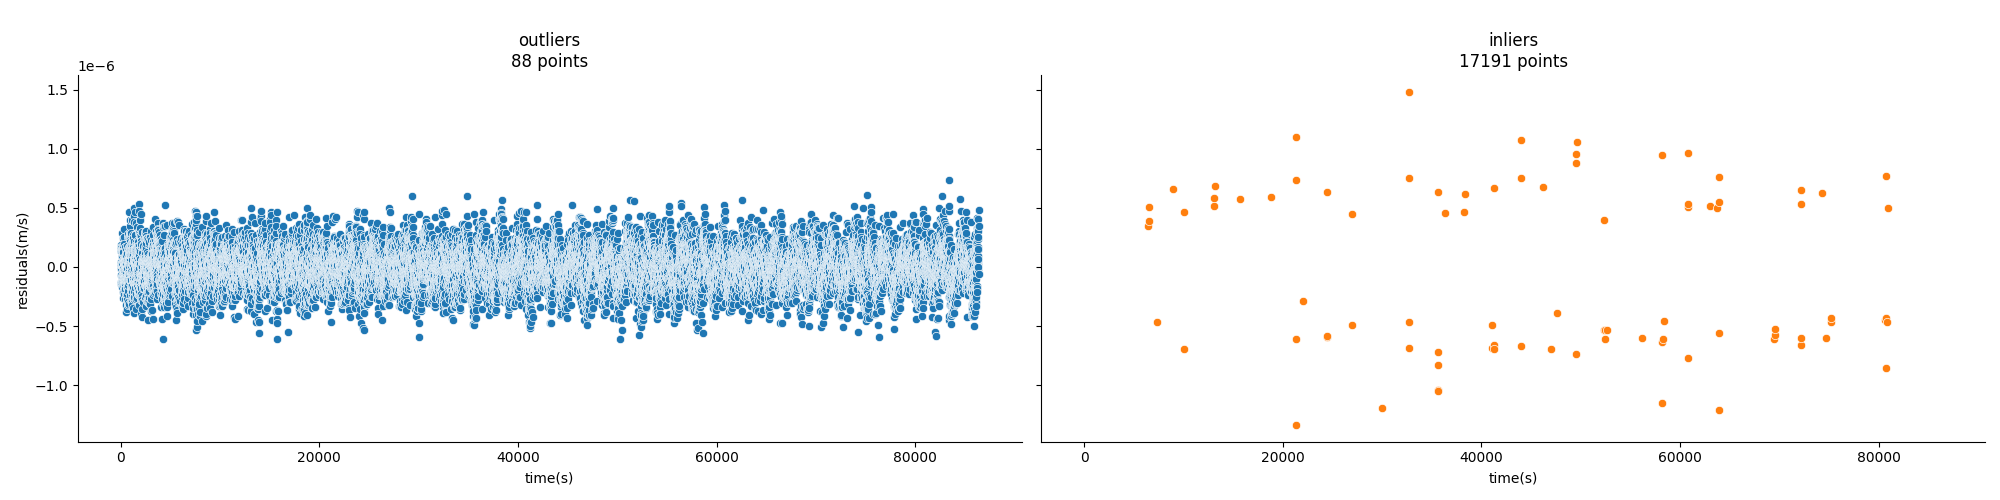 <br>

Create GEODYN-friendly delete card for a whole month day-by day: <br>
```Python
days1 = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15'] #Split up into two lists just in case of memory allocation errors
days2 = ['16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']

for d in days1:
    try:
        FilterDataSTL('pmwi','2003','03',d).createDeleteCard(fileName='D1_SCA1B_March03_DELETE_CARD')
        print(f'finished March {d}')
    except:
        print(f'March {d} not found')
        pass

```

## **AutoEncoder (Unsupervised)**

This method employs a Neural-Network which deconstructs the signal, reconstructs it using contrived parameters, then compares it to the original data. The points that are consistently difficult to reconstruct can be filtered with a threshold to be a likely outlier. You can find the wikipedia page for the autoencoder algorithm to earn more about the details. Note that this is the most computationally intensive model in this document.

>### AutoEncoder Code

```Python
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from pyod.models.auto_encoder import AutoEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import norm
import math
import seaborn as sns
import os

class FilterDataAE_v:

    def __init__(self,f_type,YYYY,MM,DD,words=1,v=5,argx='time(s)',argy='residuals(m/s)',a_type="A"):

        self.YYYY= YYYY #Can be referenced throughout class
        self.MM = MM
        self.DD = DD
        self.argx = argx
        self.argy = argy
        self.type = f_type
        self.a_type = a_type
        #v5 is the most generally useful
        self.v8 = {'units_encoder1': 64, 'units_encoder2': 16, 'units_encoder3': 8, 'units_decoder1': 8, 'units_decoder2': 32,
                   'activation': 'relu', 'optimizer': Adam(learning_rate=0.001), 'loss': 'mse', 'dropout': 0.2} 
        self.v5 = {'units_encoder1': 64, 'units_encoder2': 32, 'units_encoder3': 4, 'units_decoder1': 8, 'units_decoder2': 64,
                   'activation': 'relu', 'optimizer':Adam(learning_rate=0.001), 'loss': 'mse', 'dropout': 0.2}
        self.v1 = {'units_encoder1': 64, 'units_encoder2': 32, 'units_encoder3': 8, 'units_decoder1': 8, 'units_decoder2': 64,
                   'activation': 'relu', 'optimizer':Adam(learning_rate=0.001), 'loss': 'mse', 'dropout': 0.2}
        self.v11 = {'units_encoder1': 32, 'units_encoder2': 32, 'units_encoder3': 8, 'units_decoder1': 16, 'units_decoder2': 64,
                    'activation': 'relu', 'optimizer': Adam(learning_rate=0.001), 'loss': 'mse', 'dropout': 0.2}
        self.v = v #version you want to use
        self.words = words # = 1 if you want all the processing to appear, =0 if you just want the final product to pop up.
        
    
        
    def getData(self):
        from numpy import loadtxt
        #NOTE: This path must be edited to match the path on individual machine
        #WINDOWS: single quotes, double slashes, no slash at end, must have 'C:\\Users...' at the beginning
        #MAC (What this is written in): Single quotes, single slashes
        if self.type == 'mwi': #microwave interferometer
            pathName ={INSERT YOUR PATH HEAD HERE}'/mwi_resid_'+self.YYYY+self.MM+self.DD+'.txt/mwi_resid_'+self.YYYY+self.MM+self.DD+'.txt'
            data = loadtxt(pathName,float)
            
        elif self.type == 'lri':#laser range interferometer
            pathName = {INSERT YOUR PATH HEAD HERE}'lri_resid_'+self.YYYY+self.MM+self.DD+'.txt'
            data = loadtxt(pathName,float)
            
        elif self.type == 'pmwi': #pre-KBRR-edit Microwave interferometer
            pathName = {INSERT YOUR PATH HEAD HERE}'/mwi_resid_'+self.YYYY+self.MM+self.DD+'.txt'
            data = loadtxt(pathName,float)
            
        elif self.type == 'acc1b':#Accelerometer data
            pathName = {INSERT YOUR PATH HEAD HERE}'/ACC1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_02.asc/ACC1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_02.asc'
            
            # Read the file and store lines
            with open(pathName, 'r') as file:
                lines = file.readlines()
            
            # Skip the first 24 lines (header) and extract data lines
            header_lines = 24
            data_lines = lines[header_lines:]
            
            # Initialize an empty list to hold the structured data
            data = []
            
            # Process the data lines
            for line in data_lines:
                # Strip leading/trailing whitespace and split by spaces
                split_line = line.strip().split()
                # Add the processed line to the structured_data list
                data.append(split_line)
            file.close()
                
        elif self.type == 'sca1b': #STAR camera data
            pathName ={INSERT YOUR PATH HEAD HERE}'/SCA1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_03.asc/SCA1B_'+self.YYYY+'-'+self.MM+'-'+self.DD+'_'+self.a_type+'_03.asc'

            try:
                # Read the file and store lines
                with open(pathName, 'rb') as file:
                    lines = file.readlines()
                
                # Decode lines if opened in binary mode
                lines = [line.decode('utf-8') for line in lines]
                
                # Skip the first 20 lines (header) and extract data lines
                header_lines = 20
                data_lines = lines[header_lines:]
                
                # Initialize an empty list to hold the structured data
                data = []
                
                # Process the data lines
                for line in data_lines:
                    # Strip leading/trailing whitespace and split by spaces
                    split_line = line.strip().split()
                    # Add the processed line to the structured_data list
                    data.append(split_line)
                
            except OSError as e:
                print("Error opening file:", e)
                data = []
            file.close()

        
        return data
    
    def euler_from_quaternion(self,x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians
    
    def createDF(self,display): #display=True/False if you want the dataframe to pop up
        import pandas as pd
        from IPython.display import display
        
        if self.type == 'pmwi' or self.type == 'mwi' or self.type == 'lri':
            feature_names = ['time(s)','residuals(m/s)','altitude(m)','latitude','longitude']
            data = self.getData()
            df = pd.DataFrame(data,columns=feature_names)
            if display==True:
                display(df)
            else:
                pass
        elif self.type == 'acc1b':
            data = self.getData()
            # Define the column names. Specifics for acc1b can be found on pg 33 of L1B_Handbook
            columns = [
                'time(s)', 'identifier', 'lin_accl_x', 'lin_accl_y', 'lin_accl_z',
                'ang_accl_x', 'ang_accl_y', 'ang_accl_z', 'acl_x_res', 'acl_y_res', 'acl_z_res', 'qualflg'
            ]
            
            # Convert the structured data into a DataFrame
            df = pd.DataFrame(data)
            
            # Verify the number of columns and their content
            #print(df.head())
            
            # Set the appropriate column names
            df.columns = columns
            
            # Display the DataFrame
            if display==True:
                print(df.head())
            else:
                pass
            #make numeric values appear as numeric, skip over the "identifier"(A or B), which is a string
            for col in ['time(s)', 'lin_accl_x', 'lin_accl_y', 'lin_accl_z', 'ang_accl_x', 'ang_accl_y', 'ang_accl_z', 'acl_x_res', 'acl_y_res', 'acl_z_res']:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            
            # Adjust time steps so it matches mwi data (5s steps). If you want every second of data, comment out this section
            t_start = df[['time(s)']].values[0]
            df = df.iloc[2::5]  # Skip by 5s time steps
            df['time(s)'] = df['time(s)'] - t_start
            df = df.drop(df.index[-1])  # Drop last row since last row doesn't match
        
        elif self.type == 'sca1b':
            data = self.getData()
            #print("Data:", data[:50])
            # Define the column names. Specifics for acc1b can be found on pg 33 of L1B_Handbook
            #time = seconds since noon on Jan 01 2000. 
            #sca_id -> 1 - Star camera 1, 2 - Star camera 2, 3 = IMU, 4 = combo of 1 and 2
            #quantangle = cos mu/2 element of quaternion

            
            columns = [
                'time(s)', 'identifier', 'sca_id', 'quatangle', 'quaticoeff',
                'quatjcoeff', 'quatkcoeff', 'qual_res','qualflg']
            
            # # Convert the structured data into a DataFrame
            df = pd.DataFrame(data)
            
            # # Verify the number of columns and their content
            # #print(df.head())
            
            # # Set the appropriate column names
            df.columns = columns
            

            #make numeric values appear as numeric, skip over the "identifier"(A or B), which is a string
            for col in ['time(s)', 'sca_id', 'quatangle', 'quaticoeff','quatjcoeff', 'quatkcoeff', 'qual_res','qualflg']:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            rolls = []
            pitches = []
            yaws = []
            for row in range(len(df)):
                w = df['quatangle'][row]
                x = df['quaticoeff'][row]
                y = df['quatjcoeff'][row]
                z = df['quatkcoeff'][row]
                roll,pitch,yaw = self.euler_from_quaternion(x, y, z, w)
                rolls.append(roll)
                pitches.append(pitch)
                yaws.append(yaw)
                

            df['roll'] = rolls
            df['pitch'] = pitches
            df['yaw'] = yaws

            
            # for col in ['time(s)', 'sca_id', 'quatangle', 'quaticoeff','quatjcoeff', 'quatkcoeff', 'qual_res','qualflg','roll','pitch','yaw']:
            #     df[col] = pd.to_numeric(df[col], errors='coerce')
            # Adjust time steps so it matches mwi data (5s steps). If you want every second of data, comment out this section
            t_start = df[['time(s)']].values[0]
            df = df.iloc[2::5]  # Skip by 5s time steps
            df['time(s)'] = df['time(s)'] - t_start
            df = df.drop(df.index[-1])  # Drop last row since last row doesn't match

                        
        
        return df

    def plotData(self): #simply visualize the data

        %matplotlib widget
        plt.figure(dpi=100).set_figwidth(10)
        df = self.createDF()
        

            
        plt.plot(df[f'{self.argx}'],df[f'{self.argy}'],'b+') #splitData returns array of array
        plt.xlabel(f"{self.argx}")
        plt.ylabel(f"{self.argy}")
        if self.type == 'mwi':
            plt.title(f"mwi_{self.YYYY+self.MM+self.DD}")
        elif self.type == 'lri':
            plt.title(f"lri_{self.YYYY+self.MM+self.DD}")
        elif self.type == 'pmwi':
            plt.title(f"PreEdited_mwi_{self.YYYY+self.MM+self.DD}")
        elif self.type == 'acc1b':
            plt.title(f"PreEdited_acc1b_{self.YYYY+self.MM+self.DD}")
        elif self.type == 'sca1b':
            plt.title(f"PreEdited_sca1b_{self.YYYY+self.MM+self.DD}")
            
        plt.show()
    def preprocess_data(self):
        # Drop rows with missing values
        data = self.createDF(display=False)
        data = data.dropna().reset_index(drop=True)

        ############# Remove mean signal #####################
        mean = np.mean(data[f'{self.argy}'].values)
        clean_residuals = data[f'{self.argy}'].values - mean
                
        data[f'{self.argy}'] = clean_residuals
        
        # # Extract the residuals(m/s) column for anomaly detection
        self.residuals = data[[f'{self.argy}']].values
        self.input_dim = self.residuals.shape[1]
        
        return data
        
        

    # Define the function to build the autoencoder
    def build_autoencoder(self):
        data = self.preprocess_data()
        input_layer = Input(shape=(self.input_dim,))

        if self.v == 5:
            params = self.v5
        elif self.v == 11:
            params = self.v11
        elif self.v == 1:
            params = self.v1
        else:
            print(f"v = {self.v} not recognized")
        encoded = Dense(params['units_encoder1'], activation=params['activation'])(input_layer) #encoder: deconstruction layers
        if 'dropout' in params:
            encoded = Dropout(params['dropout'])(encoded)
        encoded = Dense(params['units_encoder2'], activation=params['activation'])(encoded)
        if 'dropout' in params:
            encoded = Dropout(params['dropout'])(encoded)
        encoded = Dense(params['units_encoder3'], activation=params['activation'])(encoded)
        if 'dropout' in params:
            encoded = Dropout(params['dropout'])(encoded)
        decoded = Dense(params['units_decoder1'], activation=params['activation'])(encoded)#decoder: Reconstruction layers
        decoded = Dense(params['units_decoder2'], activation=params['activation'])(decoded)
        decoded = Dense(self.input_dim, activation='sigmoid')(decoded)
        
        autoencoder = Model(inputs=input_layer, outputs=decoded)
        optimizer = params.get('optimizer', 'adam')
        autoencoder.compile(optimizer=optimizer, loss=params['loss'])
        
        return autoencoder

    def getFWHM(self):
        data = self.createDF(display = False)
        data_res = data[f'{self.argy}']
        
        # Fit a Gaussian distribution to the data
        mu, std = norm.fit(data_res)
        fwhm = 2 * np.sqrt(2 * np.log(2)) * std
        
        return fwhm


    def trainModel(self):
        if self.words ==1:
            print("Training final autoencoder with the best parameters...")
        else:
            pass
        final_autoencoder = self.build_autoencoder()
        final_autoencoder.fit(self.residuals, self.residuals,
                              epochs=75,  # You can increase this after finding the best params
                              batch_size=15,
                              verbose=self.words)
        
        # Predict on the same data
        if self.words ==1:
            print("Predicting on the data...")
        else:
            pass
        residuals_pred = final_autoencoder.predict(self.residuals)
        
        # Calculate reconstruction error (MSE)
        reconstruction_errors = np.mean(np.square(self.residuals - residuals_pred), axis=1)
        
        # Determine threshold for anomalies
        if self.type != 'acc1b':
            fwhm = self.getFWHM()
            if fwhm < 1e-6: #adjust threshold based on spread of the data (fwhm)
                t=98
            else:
                t = 98
                if self.words == 1:
                    print(f"threshold limit adjust to {t} due to high fwhm of {fwhm}")
                else:
                    pass
        else:
            t = 98
        threshold = np.percentile(reconstruction_errors, t)  # Adjust as needed
        if self.words ==1:
            print(f"Threshold for anomalies: {threshold}")
        else:
            pass
        
        # Flag anomalies
        anomalies = reconstruction_errors > threshold
        print(f"Number of anomalies detected: {np.sum(anomalies)}")
        return anomalies





    def createDeleteCard(self,fileName):
        step = 3 #5 second time intervals for mwi, 2 second step for lri
        df1 = self.preprocess_data()
        anomalies = self.trainModel()
        bad_df=df1[anomalies]
        #display(bad_df)
        bad_times = bad_df['time(s)'].values
    
        for t in range(len(bad_times)):
            time = bad_times[t] #current time
            te = time + step #time step after
            tb = time - step#time step before
    
            
            #calculate Hours, Minutes and Seconds:
    
            #present
            HH = int(time // (3600))
            MM = int((((time/3600) - HH)*60)//1)
            SS = int(time - (HH*3600) - (MM*60))
    
            #before (start)
            Hb = int(tb // (3600))
            Mb = int((((tb/3600) - Hb)*60)//1)
            Sb = int(tb - (Hb*3600) - (Mb*60)) 
    
            #after (End)
            He = int(te // (3600))
            Me = int((((te/3600) - He)*60)//1)
            Se = int(te - (He*3600) - (Me*60))  
    
    
            
            #address if minute changes into hours
            if Me >= 60: #if the minutes crosses 60
                He += 1 #bump up hour
                Me %= 60 #reset minute modulo (remainder of ) /60
            if Mb <= 0: #if minutes are bumped down under zero
                if Hb != 0: 
                    Hb -= 1 #bump hour down
                    Mb += 60 #add 60 so it is base 60 again (ex. -2 + 60 = 58min)
                else: #if hour is 0, then we can't bump it down, without this line the minutes do weird things and becomes -16
                    Mb = 0
                    
            #check 1 or 2 digits
            if HH / 10 >= 1: #2-digit numbers are greater than 10
                HH = str(HH)
            else: #if not 2 didgts, add a zero to the string
                HH = '0'+str(HH)
                
            if Hb / 10 >= 1: 
                Hb = str(Hb)
            else:
                Hb = '0'+str(Hb)
                
            if He / 10 >= 1: 
                He = str(He)
            else:
                He = '0'+str(He)    
                    
    
    ###############################
            #bump minute if seconds crosses minute path
            if Se >=60:
                Me += 1
            if Sb <= 0:
                Mb -= 1
    
            #check if minutes are 1 or 2 digits
            if MM / 10 >= 1:
                MM = str(MM)
            else: 
                MM = '0'+str(MM)
            if Mb / 10 >= 1: 
                Mb = str(Mb)
            else:
                Mb = '0'+str(Mb)
                
            if Me / 10 >= 1: 
                Me = str(Me)
            else:
                Me = '0'+str(Me)
    
    
    #########################
    
            
            #boundaries around minute changes
            if Se >=60:
                Se = Se%60
            if Sb <= 0:
                Sb += 60
            elif Sb <= 0 and Mb == 0:
                Sb == 0
    
            #2 digits check
            if SS / 10 >= 1: 
                SS = str(SS)
            else: 
                SS = '0'+str(SS)
                
            if Sb / 10 >= 1: 
                Sb = str(Sb)
            else:
                Sb = '0'+str(Sb)
                
            if Se / 10 >= 1: 
                Se = str(Se)
            else:
                Se = '0'+str(Se)

            hms1 = Hb+Mb+Sb+'.00'
            hms2 = He+Me+Se+'.00'
            #print(f'DELETE         44                       {self.YYYY[-2:]}{self.MM}{self.DD}{hms1}     {self.YYYY[-2:]}{self.MM}{self.DD}{hms2}     hiKBRR')
            
            f = open(f'{fileName}.txt', "a") # "a" is append mode
            #DO NOT change the formatting of the next line unless you know the delete card format as per the GEODYN documentation
            f.write(f'DELETE         44                       {self.YYYY[-2:]}{self.MM}{self.DD}{hms1}     {self.YYYY[-2:]}{self.MM}{self.DD}{hms2}     hiKBRR\n')
            f.close()
            #Guide for 80 character format limit
            #print('----+----1----+----2----+----3----+----4----+----5----+----6----+----7----+----8')
            #print("")
            
            
    
            #Line for testing purposes
            #print(f"{Hb}{Mb}{Sb}.00  {He}{Me}{Se}.00 where bad time is: {HH}{MM}{SS}")
    


    

    def plotEdit(self): #plot the filtered data
        # Plot the results
        #this magic inline command makes the plot interactive, but you must have pyod and pyod widgets installed
        %matplotlib widget

        anomalies = self.trainModel()
        processed_data = self.preprocess_data()
        
        plt.figure(figsize=(10, 6))
        
        plt.plot(processed_data[f'{self.argx}'], processed_data[f'{self.argy}'], 'b+', label='Data')
        
        anomaly_dates = processed_data[f'{self.argx}'][anomalies]
        anomaly_values = processed_data[f'{self.argy}'][anomalies]

        if self.argy == 'roll' or self.argy == 'pitch' or self.argy == 'yaw':
            unit = "rad"
        elif 'a' in self.argy and 'c' in self.argy and 'l' in self.argy:
            unit = "$m/s^2$"
        else:
            unit = ""
        
        plt.plot(anomaly_dates, anomaly_values, 'ro', markersize=5, label='Anomaly')
        
        plt.title(f'Autoencoder(v{self.v}): {self.type}_{self.YYYY}{self.MM}{self.DD} with {len(anomaly_dates)} outliers')
        
        plt.xlabel(f'{self.argx}')
        
        plt.ylabel(f'{self.argy} {unit}')
        
        plt.legend()
        
        plt.grid()
        
        plt.show()    
    
   
    
    # Function to perform grid search
    def grid_search(self,X_train):
        best_score = float('inf')
        best_params = None
        # Define a smaller parameter grid to test
        param_grid = {
            'units_encoder1': [32, 64],
            'units_encoder2': [16, 32],
            'units_encoder3': [4, 8],
            'units_decoder1': [8, 16],
            'units_decoder2': [32, 64],
            'activation': ['relu'],
            'optimizer': [Adam(learning_rate=0.001)],
            'loss': ['mse'],
            'dropout': [0.2]
        }
            
        total_combinations = len(param_grid['units_encoder1']) * len(param_grid['units_encoder2']) * \
                             len(param_grid['units_encoder3']) * len(param_grid['units_decoder1']) * \
                             len(param_grid['units_decoder2']) * len(param_grid['activation']) * \
                             len(param_grid['optimizer']) * len(param_grid['loss']) * len(param_grid['dropout'])
        
        combination_index = 0
        
        for encoder1 in param_grid['units_encoder1']:
            for encoder2 in param_grid['units_encoder2']:
                for encoder3 in param_grid['units_encoder3']:
                    for decoder1 in param_grid['units_decoder1']:
                        for decoder2 in param_grid['units_decoder2']:
                            for activation in param_grid['activation']:
                                for optimizer in param_grid['optimizer']:
                                    for loss in param_grid['loss']:
                                        for dropout in param_grid['dropout']:
                                            combination_index += 1
                                            print(f"Testing combination {combination_index}/{total_combinations}:")
                                            params = {
                                                'units_encoder1': encoder1,
                                                'units_encoder2': encoder2,
                                                'units_encoder3': encoder3,
                                                'units_decoder1': decoder1,
                                                'units_decoder2': decoder2,
                                                'activation': activation,
                                                'optimizer': optimizer,
                                                'loss': loss,
                                                'dropout': dropout
                                            }
                                            print(f"Parameters: {params}")
                                            autoencoder = build_autoencoder(input_dim, params)
                                            history = autoencoder.fit(X_train, X_train,
                                                                      epochs=10,  # Reduced for quicker testing
                                                                      batch_size=15,
                                                                      verbose=0,
                                                                      validation_split=0.1,
                                                                      callbacks=[EarlyStopping(patience=3)])
                                            score = min(history.history['val_loss'])
                                            print(f"Validation Loss: {score}")
                                            if score < best_score:
                                                best_score = score
                                                best_params = params
                                                print(f"New best score: {best_score}")
                                                print(f"New best parameters: {best_params}")
        
        return best_params  
```

>### AutoEncoder Code Notes/Examples:

Syntax to Use FilterDataAE_v:<br>
`FilterDataAE_v({data_type},{desired_year},{month},{day},{words=1,0},{version},{argx},{argy},{satellite A or B}).{desired_function}()`<br>
<br>
Valid data_types: `['mwi','pmwi','acc1b','sca1b']`<br>
Valid years: `['2002' -through-> 'end of mission']` note that anything after JUNE 2018 is GRACE-FO Data<br>
Valid Months: `['01' -through-> '12']`<br>
Valid Days: `['01' -through-> '31']`<br>
Valid argx (x-axis) or argy (y-axis): Note that default argx = 'time(s)' and argy = 'residuals(m/s)' <br>
>For mwi/lri data: `['time(s)','residuals(m/s)','altitude(m)','latitude','longitude']`<br>
>For acc1b data: columns = `['time(s)', 'identifier', 'lin_accl_x', 'lin_accl_y', 'lin_accl_z','ang_accl_x', 'ang_accl_y', 'ang_accl_z', 'acl_x_res', 'acl_y_res', 'acl_z_res', 'qualflg']` <br>
>For sca1b data: columns = `['time(s)', 'identifier', 'sca_id', 'quatangle', 'quaticoeff','quatjcoeff', 'quatkcoeff', 'qual_res','qualflg','roll','pitch','yaw']` <br>

Valid words: `[words=0,words=1]` (0=Don't print prompts while code is working, 1=print prompts while code is working)<br>

Valid versions: `[v=1,v=5,v=8,v=11]` Note: These  versions of the autoencoder are somewhat arbitrary. They are the result of running a grid search on the autoencoder with different versions of training data (Dropping certain rows, etc.) All that is different with them is the hidden neurons in the Neural Network. I would recommend using v5, if that doesn't work, try v1. Honestly, if that doesn't do a good job, you can try the other versions, but changing other parameters in the autoencoder (such as NN architecture, epochs, batch size, activation func, etc.) will probably give you better results. <br>

Valid Sattelite types (only for acc1b or sca1b data, otherwise you can skip this): `['A','B']` <br>
<br>
**Examples:** <br>
To create the dataframe: <br>
```Python
df = FilterDataAE_v('acc1b', '2006', '06', '22', words = 1,argy='acl_y_res').createDF()
```
To visualize the raw data of a certain day with no analysis:<br>
```Python
FilterDataAE_v('acc1b', '2006', '06', '22', words = 1,argy='acl_y_res').plotData()
```
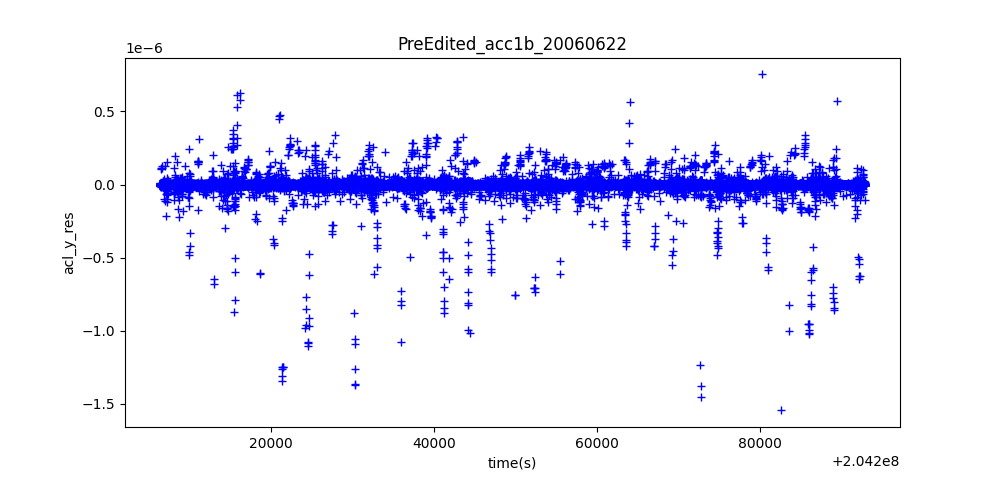 <br>

Plot data with marked anomalies: <br>
```Python
FilterDataAE_v('pmwi', '2016', '06', '22',v=5,words = 1,argy='residuals(m/s)').plotEdit()
```
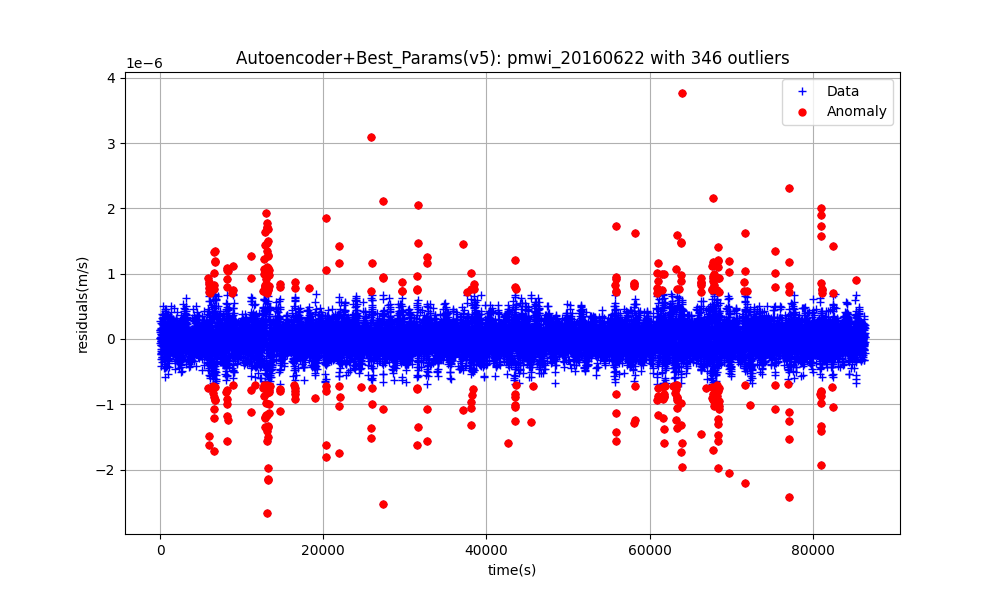 <br>
Produce a Boolean list of anomaly markers (True = anomaly, False = normal): <br>
```Python
anoms = FilterDataAE_v('sca1b', '2016', '06', '22',argy='qual_res').trainModel()
```
Create GEODYN-friendly delete card for a whole month day-by day: <br>
```Python
#This took my computer about 90 minutes to run for each of the 2 lists, a little less than 3 hrs total.
days1 = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15'] #Split into 2 lists for memory allocation issues.
days2 = ['16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']

for d in days1:
    try:
        FilterDataAE_v('pmwi','2003','03',d,words = 0,v=5,argy = 'qual_res').createDeleteCard(fileName='March03_DELETE_CARD')
        print(f'finished March {d}')
    except:
        print(f'March {d} not found')
        pass
```

Note that the `grid_search(self,X_train)` function has not been tested within the class. It is just stored there for convenience. This function will test all combinations included in the declared parameter grid. It will run the autoencoder for each combo, and then it will determine the best model based on the magnitude of the loss function. Less loss = more better. Will probably require some debugging to get it to work correctly within the class. This is how the different autoencoder versions were created.  

## **Isolation Forest - Trained On previous Data (Unsupervised)**

Isolation Forest is an unsupervised algorithm, so it cannot be trained on labeled data. Notice how the following code is not in a class, but is just written globally. This could be incorporated into the FilterDataRFNN.RF() method as another model ('if'). Also, other methods in that same class can be used to obtain the dataframes needed to run the code below (df2 = FilterDataRFNN().createTrain() and  df1 = FilterDataRFNN().createTest()). Overall, IF seems to be a successful method in locating anomalies for 'bad' days (FWHM > 10e-6), but does not classify the majority of anomalies correctly. The code included a classification report that can help you visualize where it goes wrong. Possible improvements include adding more data, adding data with more features (feature engineering), more/different preprocessing methods, and parameter tuning of the IF model.

>### Isolation Forest Code:

```Python
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

###You can create these dfs using the FilterDataRFNN().createTrain() and  FilterDataRFNN().createTest() methods listed in the Random Forest / MLP documantation. Just check out the 
###Random Forest / MLPClassifier code for arguments.
days1 = ['01','02','03','04']
YYYY1 = '2007'
MM1 = '03'
df2 = FilterDataRFNN().createTrain()
df1 = FilterDataRFNN().createTest(YYYY1,MM1,days1)

df_train = df2
df_test = df1
features = ['residuals(m/s)','altitude(m)'] #This can be altered to include any features in the df, but I found this yielded the best results.

X_train = df_train[features]
df_train['anomaly'] = df_train['anomaly'].astype(bool) #Explicitly making the 'anomaly' column Boolean has improved some past issues.
y_train = df_train['anomaly']
y_train_if = [1 if y == False else -1 for y in y_train] #IF doesn't use 1/0 or True/False. It uses 1/-1
X_test = df_test[features]

# Scale the data

scaler = StandardScaler()
# scaler = RobustScaler() #possible alternative scalar. Works better for RF in my experience.

scaled_data_test = scaler.fit_transform(X_train)

 

# Apply Isolation Forest

iso_forest = IsolationForest(contamination=0.07, random_state=42) #parameters can be adjusted
iso_forest.fit(scaled_data_test)

#see if IF prediction compares to the training targets
y_pred_train = iso_forest.predict(scaled_data_test) #this line is to test the IF on the training data and it will then be compared to the pre-made labels.

# y_pred_test = if_model.fit_predict(scaled_data_test) #Use this line to fit the IF to test data


# -1 indicates anomaly, 1 indicates normal
y_pred_train_if = []
for y in y_pred_train:
    if y == -1:
        y_pred_train_if.append("Anomaly")
    else:
        y_pred_train_if.append("Normal")

 
##############Following code mostly written by Alexandre Belli (61A)
# Detect consecutive anomalies

def detect_consecutive_anomalies(anomalies, threshold=5):

    consecutive = []

    start = None

   

    for i in range(len(anomalies)):

        if anomalies[i] == 'Anomaly':

            if start is None:

                start = i

        else:

            if start is not None:

                if i - start >= threshold:

                    consecutive.append((start, i - 1))

                start = None

   

    if start is not None and len(anomalies) - start >= threshold:

        consecutive.append((start, len(anomalies) - 1))

   

    return consecutive

 

# Check if close anomalies require marking the regions between them as anomalous

def mark_regions_between_close_anomalies(df, consecutive_anomalies, distance=20):

    marked_anomalies = np.zeros(len(df), dtype=bool)

   

    for i in range(len(consecutive_anomalies) - 1):

        start1, end1 = consecutive_anomalies[i]

        start2, end2 = consecutive_anomalies[i + 1]

       

        if start2 - end1 <= distance:

            # Mark the region between end1 and start2 as anomalous

            marked_anomalies[end1 + 1:start2] = True

   

    return marked_anomalies

 

# Parameters

consecutive_threshold = 10  # Minimum length of consecutive anomalies

close_distance = 200         # Maximum distance between consecutive anomaly sequences

 

# Find consecutive anomalies

consecutive_anomalies = detect_consecutive_anomalies(y_pred_train_if, threshold=consecutive_threshold)

 

# Determine which regions between close anomalies should be marked as anomalous

marked_anomalies = mark_regions_between_close_anomalies(df_train, consecutive_anomalies, distance=close_distance)

 

# Update the anomaly column based on marked anomalies
y_pred_train = np.where(marked_anomalies, 'Anomaly', y_pred_train_if)


y_pred_train_final = []
#Put back into IF language
for y in y_pred_train: 
    if y == "Normal":
        y_pred_train_final.append(1)
    else:
        y_pred_train_final.append(-1)
        

y_bool = []
#Put anomalies into Boolean language
for i in y_pred_train_final:
    if i == -1:
        y_bool.append(False)
    else:
        y_bool.append(True)


#Only use to check how well IF compares to the original solution. (Current version does not do well in finding anomalies, ~7% accuracy)
print(classification_report(y_train_if, y_pred_train_final))
cm = confusion_matrix(y_train_if, y_pred_train_final)
plt.close()
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Anomaly','Normal'], yticklabels=['Anomaly','Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Training Data set 2002,2003,2004')
plt.show()
print(cm)





plt.close()
plt.figure(figsize=(10,6))
plt.subplots_adjust(right=0.9, top=0.8) 
sns.scatterplot(x=df_train['time(s)'], y=df_train['residuals(m/s)'], hue=y_bool, palette={0: 'blue', 1: 'red'}, style=y_bool, markers={0: '.', 1: 'X'},edgecolor='none',s=50)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Data', 'Anomaly']  # Custom labels
plt.legend(handles=handles, labels=labels)
#plt.title(f"mwi{YYYY1}{MM1}{days1[0]}-{days1[-1]} RF Classifier on 12 months with {sum(y_pred_clf)} outliers,RobustScalar")
plt.title(f'Alex Solution IF: 2002,2003,2004 with {sum(y_bool)} outliers')
plt.show()
#####Original
plt.figure(figsize=(10,6))
plt.subplots_adjust(right=0.9, top=0.8) 
sns.scatterplot(x=df_train['time(s)'], y=df_train['residuals(m/s)'], hue=y_train, palette={0: 'blue', 1: 'red'}, style=y_train, markers={0: '.', 1: 'X'},edgecolor='none',s=50)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Data', 'Anomaly']  # Custom labels
plt.legend(handles=handles, labels=labels)
#plt.title(f"mwi{YYYY1}{MM1}{days1[0]}-{days1[-1]} RF Classifier on 12 months with {sum(y_pred_clf)} outliers,RobustScalar")
plt.title(f'Original Solution: 2002,2003,2004 with {sum(y_train)} outliers')
plt.show()


```

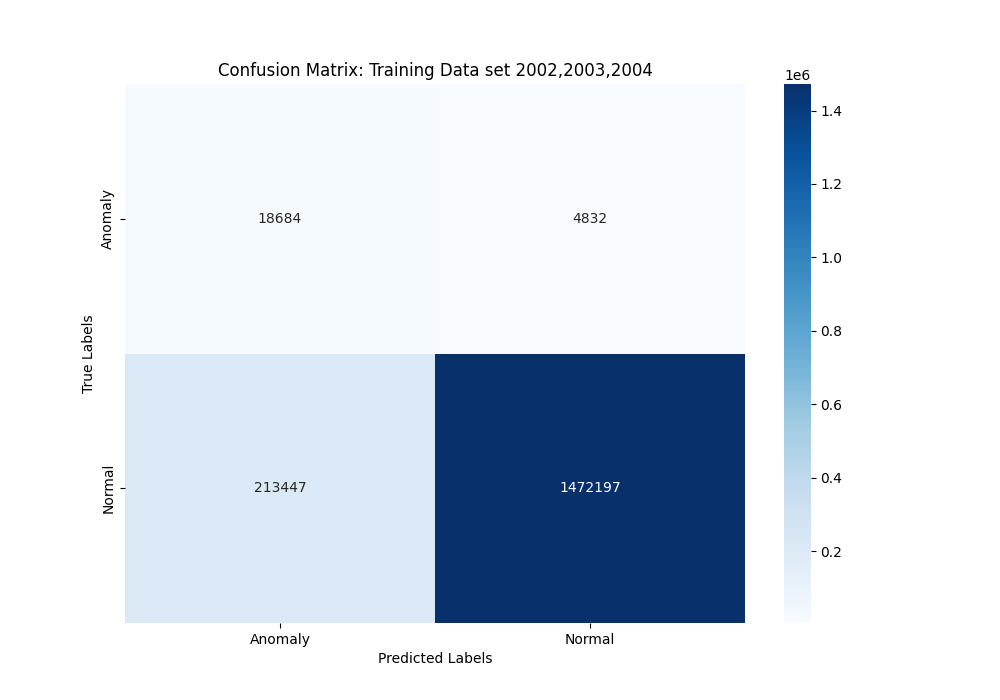 <br>

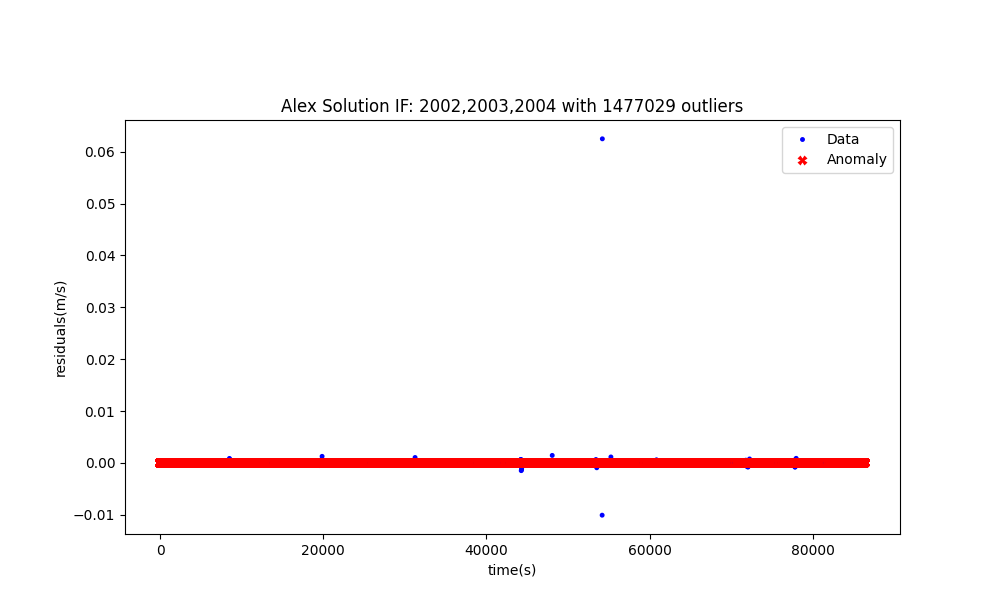 <br>

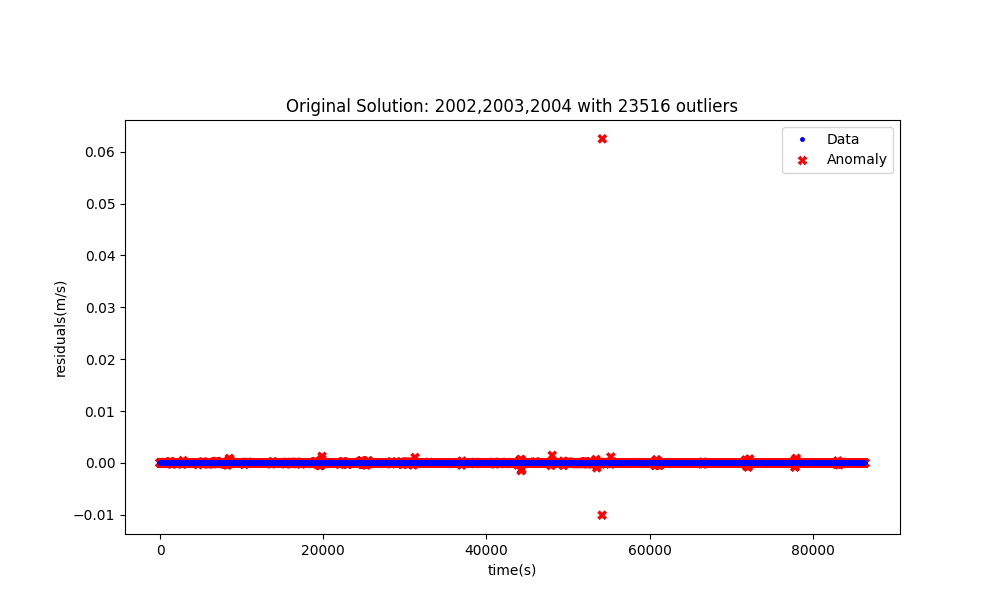 <br>

# Isolation Forest - Not Previously Trained (Alex's Solution)

>***Alex IF Code:***

```Python

import numpy as np

import pandas as pd

from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

 

# Sample data creation for demonstration purposes

# df = pd.DataFrame({'1': np.sin(np.linspace(0, 20, 100)) + np.random.normal(0, 0.5, 100)})

 

# Standardize the data

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_test[['residuals(m/s)']])

 

# Apply Isolation Forest

model = IsolationForest(contamination=0.07, random_state=42)

df_test['anomaly'] = model.fit_predict(scaled_data)

 

# -1 indicates anomaly, 1 indicates normal

df_test['anomaly'] = df_test['anomaly'].map({-1: 'Anomaly', 1: 'Normal'})

 

# Detect consecutive anomalies

def detect_consecutive_anomalies(anomalies, threshold=5):

    consecutive = []

    start = None

   

    for i in range(len(anomalies)):

        if anomalies[i] == 'Anomaly':

            if start is None:

                start = i

        else:

            if start is not None:

                if i - start >= threshold:

                    consecutive.append((start, i - 1))

                start = None

   

    if start is not None and len(anomalies) - start >= threshold:

        consecutive.append((start, len(anomalies) - 1))

   

    return consecutive

 

# Check if close anomalies require marking the regions between them as anomalous

def mark_regions_between_close_anomalies(df, consecutive_anomalies, distance=20):

    marked_anomalies = np.zeros(len(df), dtype=bool)

   

    for i in range(len(consecutive_anomalies) - 1):

        start1, end1 = consecutive_anomalies[i]

        start2, end2 = consecutive_anomalies[i + 1]

       

        if start2 - end1 <= distance:

            # Mark the region between end1 and start2 as anomalous

            marked_anomalies[end1 + 1:start2] = True

   

    return marked_anomalies

 

# Parameters

consecutive_threshold = 10  # Minimum length of consecutive anomalies

close_distance = 200         # Maximum distance between consecutive anomaly sequences

 

# Find consecutive anomalies

consecutive_anomalies = detect_consecutive_anomalies(df_test['anomaly'], threshold=consecutive_threshold)

 

# Determine which regions between close anomalies should be marked as anomalous

marked_anomalies = mark_regions_between_close_anomalies(df_test, consecutive_anomalies, distance=close_distance)

 

# Update the anomaly column based on marked anomalies

df_test['anomaly'] = np.where(marked_anomalies, 'Anomaly', df_test['anomaly'])

 

# Plot the results

plt.figure(figsize=(12, 6))

plt.plot(df_test.index, df_test['residuals(m/s)'], 'b+',label='Time Series')

plt.plot(df_test.index[df_test['anomaly'] == 'Anomaly'], df_test['residuals(m/s)'][df_test['anomaly'] == 'Anomaly'], 'r+', label='Anomalies')

 

# Plot consecutive anomalies

#for start, end in consecutive_anomalies:

#    plt.axvspan(start, end, color='green', alpha=0.3, label='Consecutive Anomalies')

 

plt.title('IF: 20020405 ')

plt.xlabel('Index')

plt.ylabel('Value')

plt.legend()

#plt.savefig('good_test.png')

 

plt.show()
```

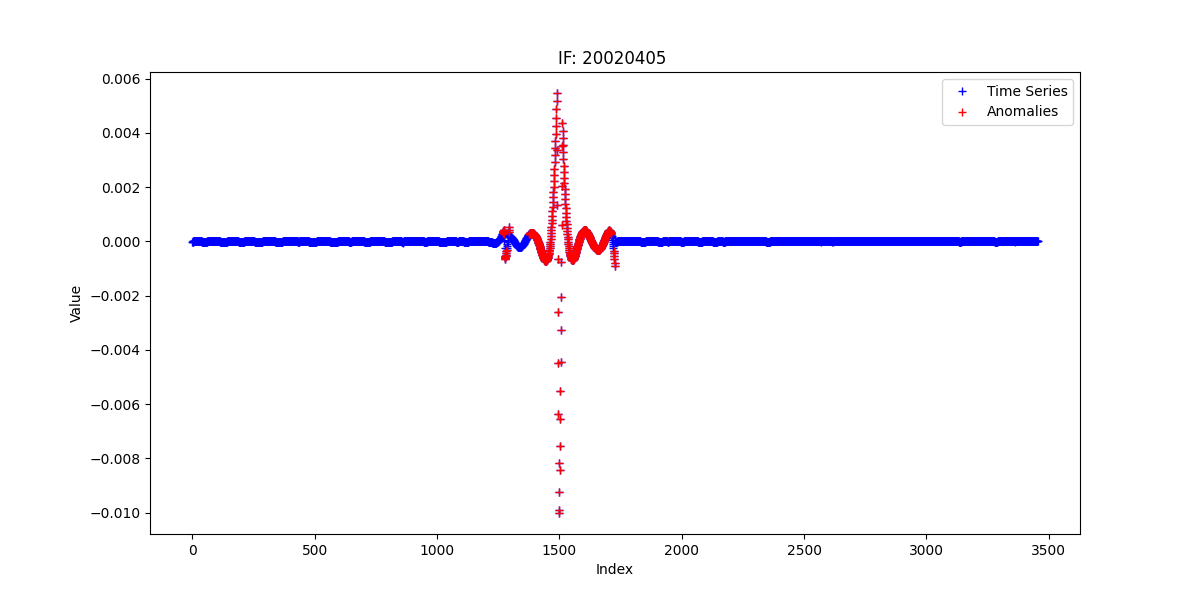